In [1]:
from itertools import combinations, chain
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.svm import SVC
from scipy.stats import linregress
from sklearn.datasets import load_digits
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
%matplotlib inline
import seaborn as sns

In [7]:
chemicals = pd.read_csv("chemicals_processed.csv")
droughts = pd.read_csv("droughts_processed.csv")
earnings = pd.read_csv("earnings_processed.csv")
#education_attainment = pd.read_csv("education_attainment.csv")
industry_occupation = pd.read_csv("industry_occupation_processed.csv")
water_usage = pd.read_csv("water_usage_processed.csv")

c:\users\jocel\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
'''
@param df : pandas dataframe
@param other_df : another pandas dataframe
@reurn merge of two dataframes
'''
def join_two_datasets(df, other_df, fields):

    df['fips'] = df['fips'].astype(int)
    other_df['fips'] = other_df['fips'].astype(int)
    return pd.merge(df, other_df, on=fields, how="inner")

'''
@return dictionary mapping name to pandas data frame
'''
def generate_dfs():
    all_dfs = {}
    all_dfs['water_usage'] = preprocess_water_usage()
    all_dfs['industry_occupation'] = preprocess_industry_occupation()
    all_dfs['chemicals'] = preprocess_chemicals()
    all_dfs['droughts'] = preprocess_droughts()
    all_dfs['earnings'] = preprocess_earnings()
    all_dfs['education_attainment'] = preprocess_education_attainment()
    return all_dfs

In [18]:
c_e = join_two_datasets(chemicals, earnings, ['fips', 'year'])

In [ ]:
c_e.chemical_species.unique()

LinregressResult(slope=-14.89043030919451, intercept=33337.194496704404, rvalue=-0.044060008214784056, pvalue=8.069275252618154e-09, stderr=2.580712238708455)
LinregressResult(slope=-14.89043030919451, intercept=33337.194496704404, rvalue=-0.044060008214784056, pvalue=8.069275252618154e-09, stderr=2.580712238708455)
LinregressResult(slope=-14.89043030919451, intercept=33337.194496704404, rvalue=-0.044060008214784056, pvalue=8.069275252618154e-09, stderr=2.580712238708455)
LinregressResult(slope=-14.89043030919451, intercept=33337.194496704404, rvalue=-0.044060008214784056, pvalue=8.069275252618154e-09, stderr=2.580712238708455)
LinregressResult(slope=-14.89043030919451, intercept=33337.194496704404, rvalue=-0.044060008214784056, pvalue=8.069275252618154e-09, stderr=2.580712238708455)
LinregressResult(slope=-14.368485014733725, intercept=32726.78858241313, rvalue=-0.017801341680144113, pvalue=1.4965224328160794e-05, stderr=3.3186933144946424)
LinregressResult(slope=-14.368485014733725, 

c:\users\jocel\appdata\local\programs\python\python35\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


LinregressResult(slope=0.09698862179037807, intercept=32385.95134167823, rvalue=0.02879061719135144, pvalue=7.442293717986698e-28, stderr=0.008863871996320506)
LinregressResult(slope=0.09698862179037807, intercept=32385.95134167823, rvalue=0.02879061719135144, pvalue=7.442293717986698e-28, stderr=0.008863871996320506)
LinregressResult(slope=0.09698862179037807, intercept=32385.95134167823, rvalue=0.02879061719135144, pvalue=7.442293717986698e-28, stderr=0.008863871996320506)
LinregressResult(slope=0.09698862179037807, intercept=32385.95134167823, rvalue=0.02879061719135144, pvalue=7.442293717986698e-28, stderr=0.008863871996320506)
LinregressResult(slope=0.09698862179037807, intercept=32385.95134167823, rvalue=0.02879061719135144, pvalue=7.442293717986698e-28, stderr=0.008863871996320506)
LinregressResult(slope=0.09698862179037807, intercept=32385.95134167823, rvalue=0.02879061719135144, pvalue=7.442293717986698e-28, stderr=0.008863871996320506)
LinregressResult(slope=-14.8904303091945

OSError: [Errno 22] Invalid argument: 'Arsenic.png'

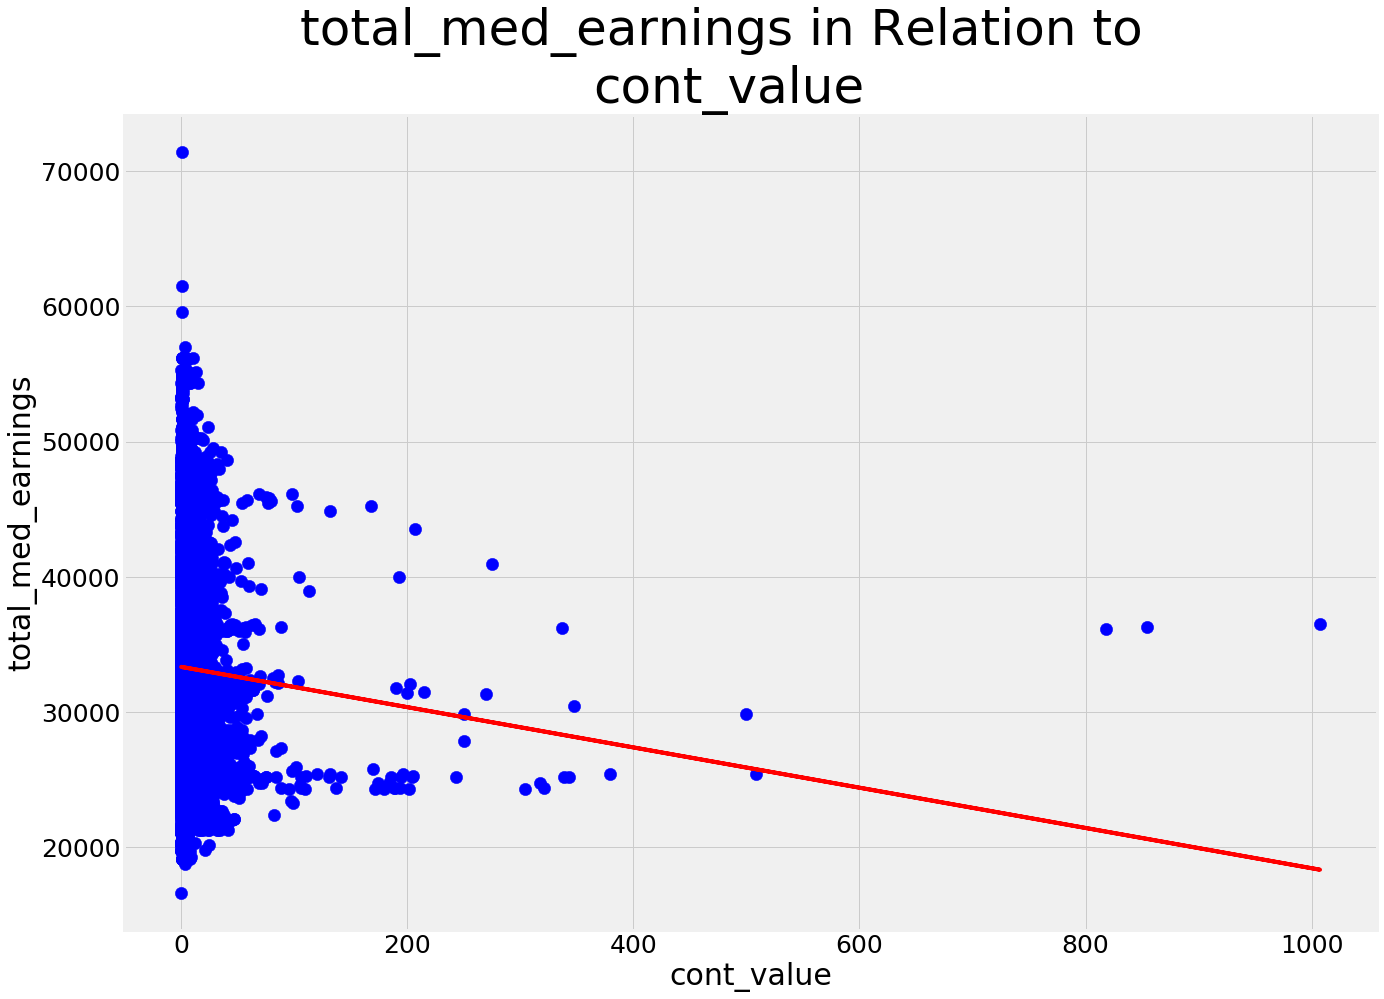

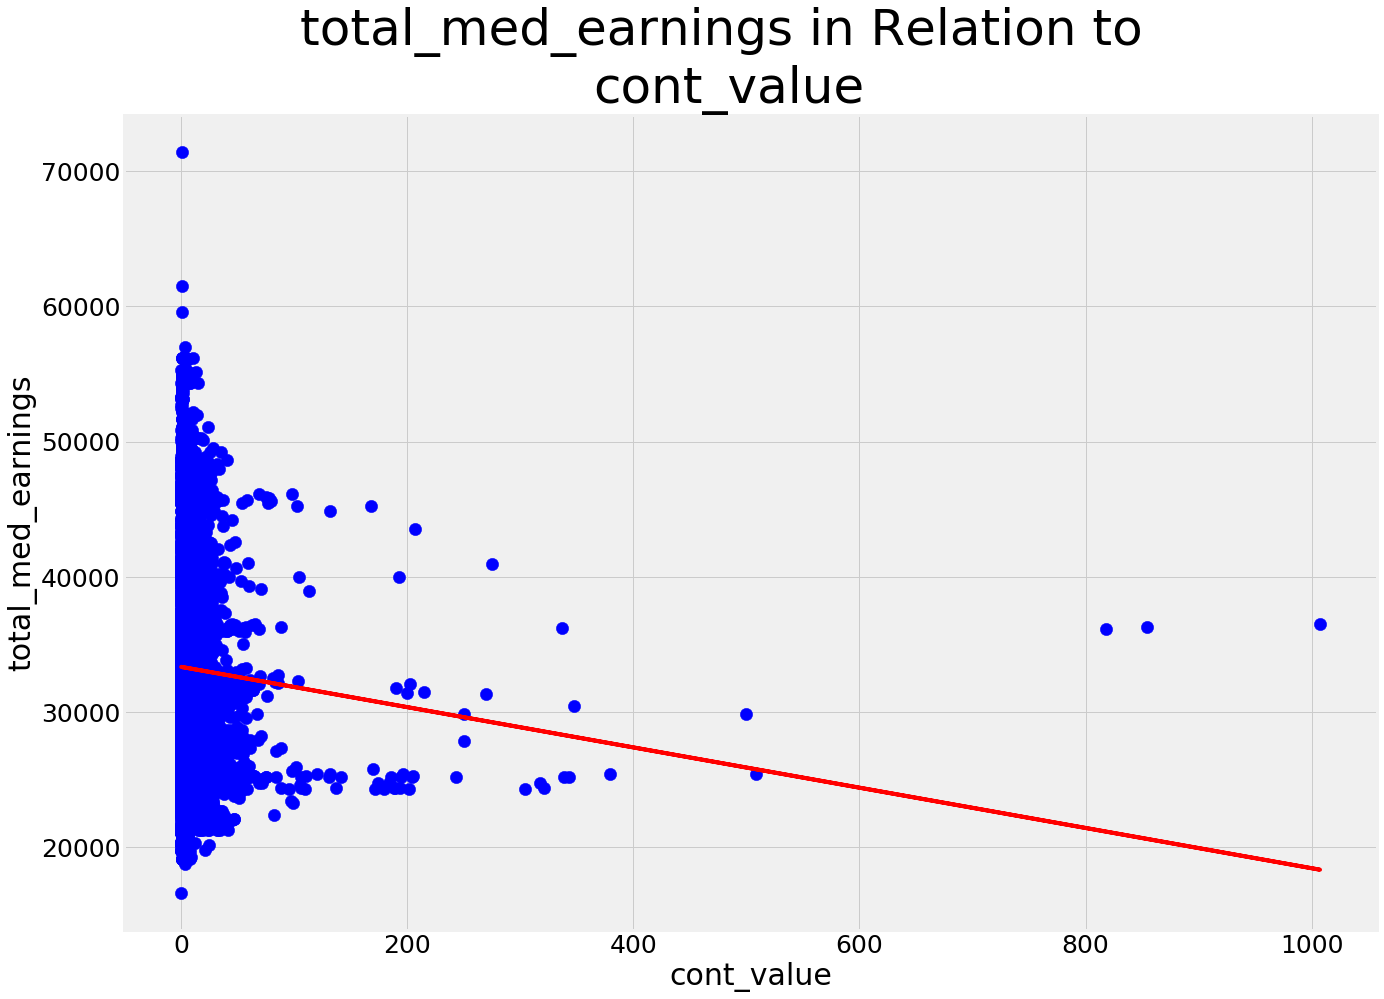

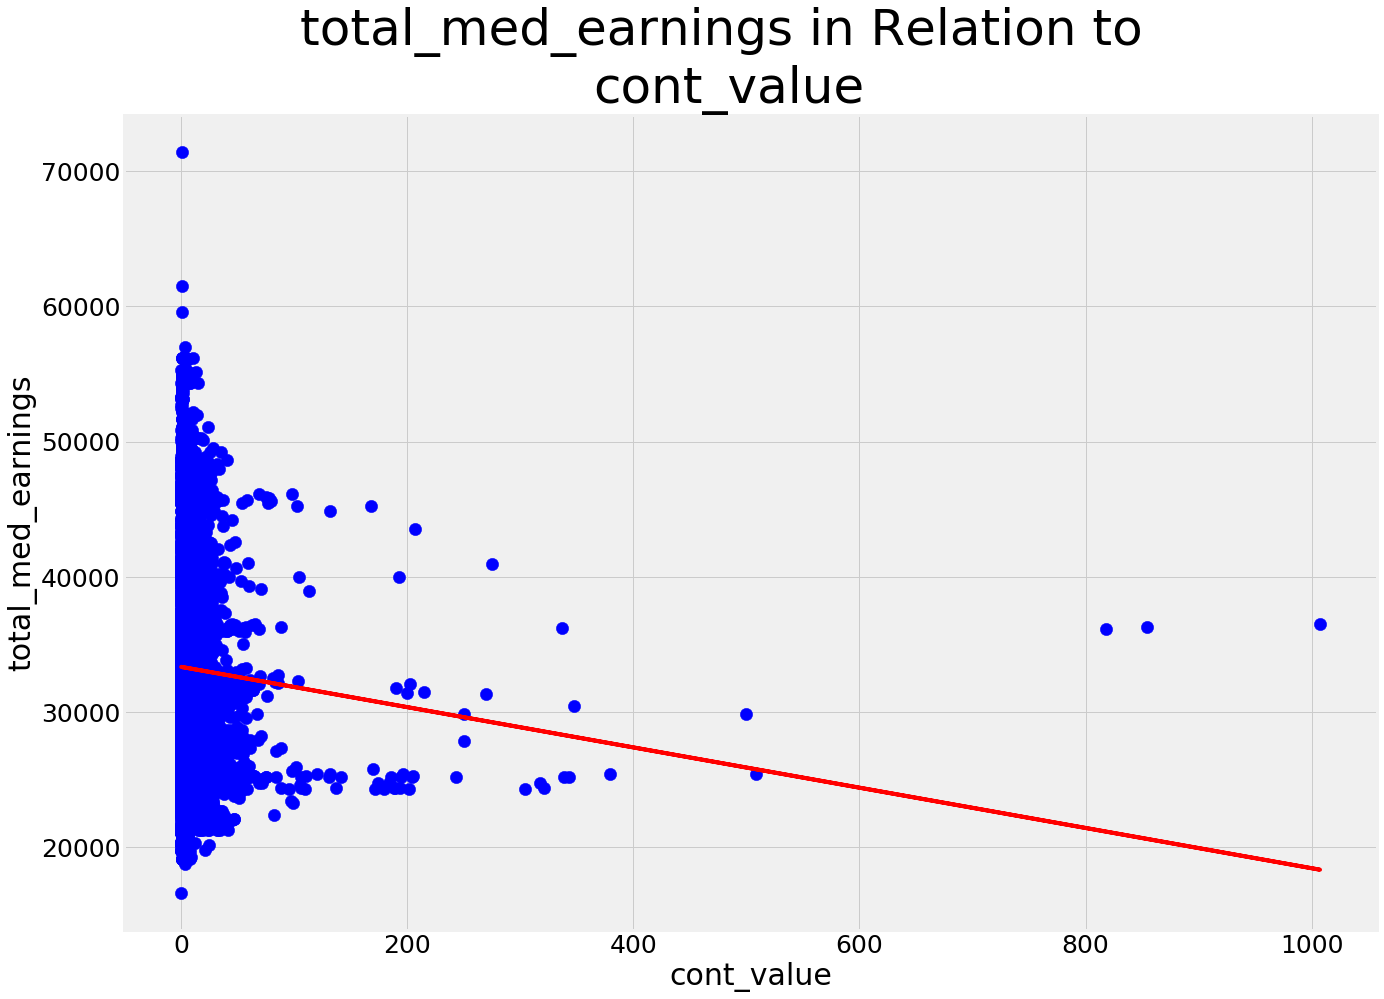

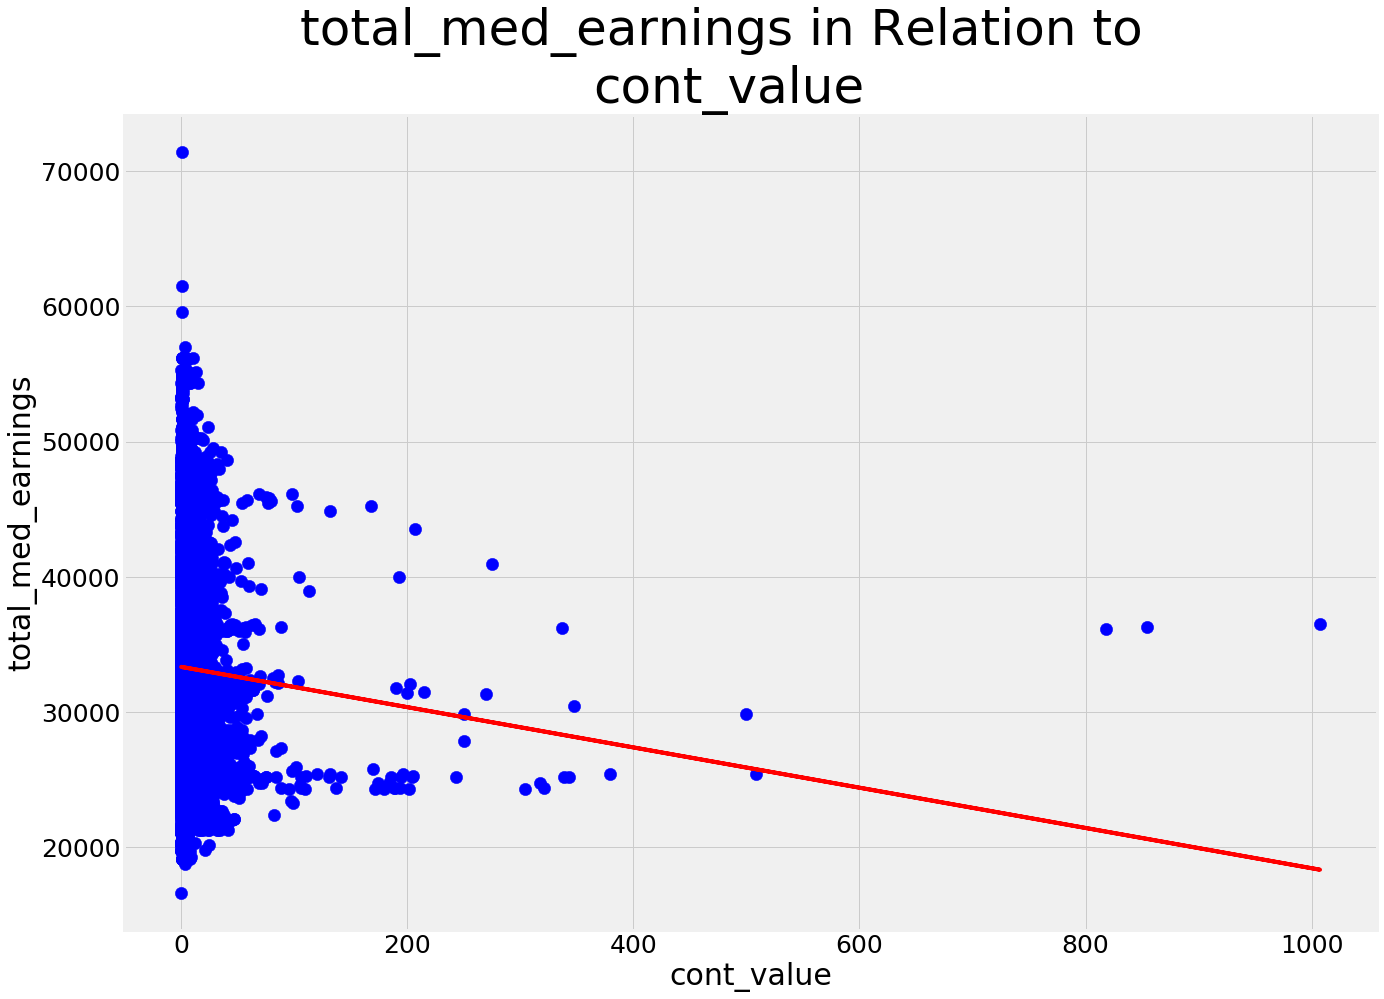

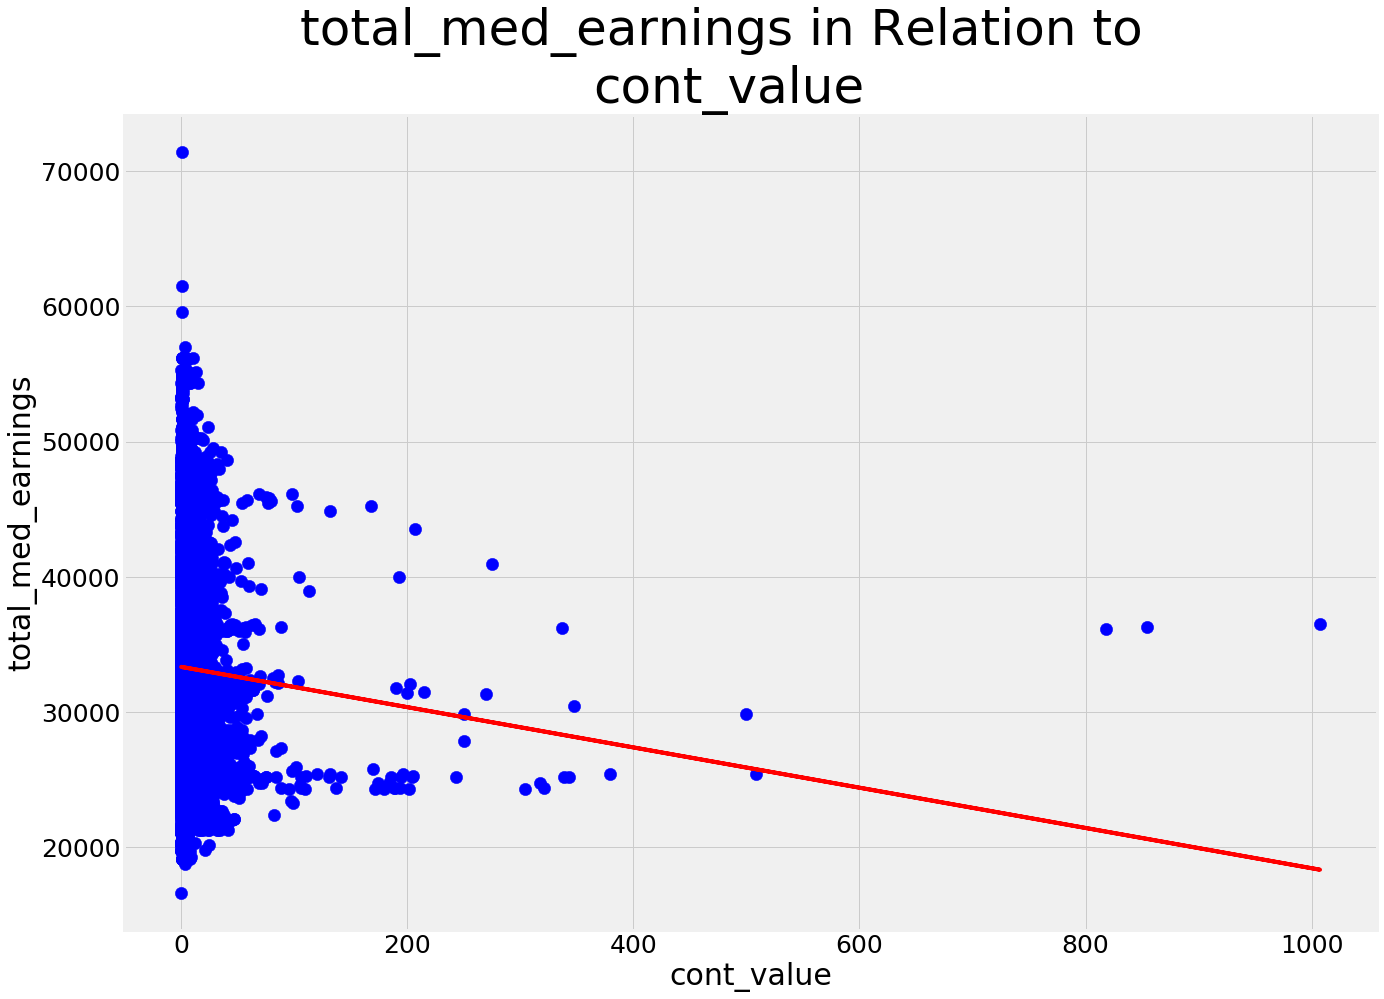

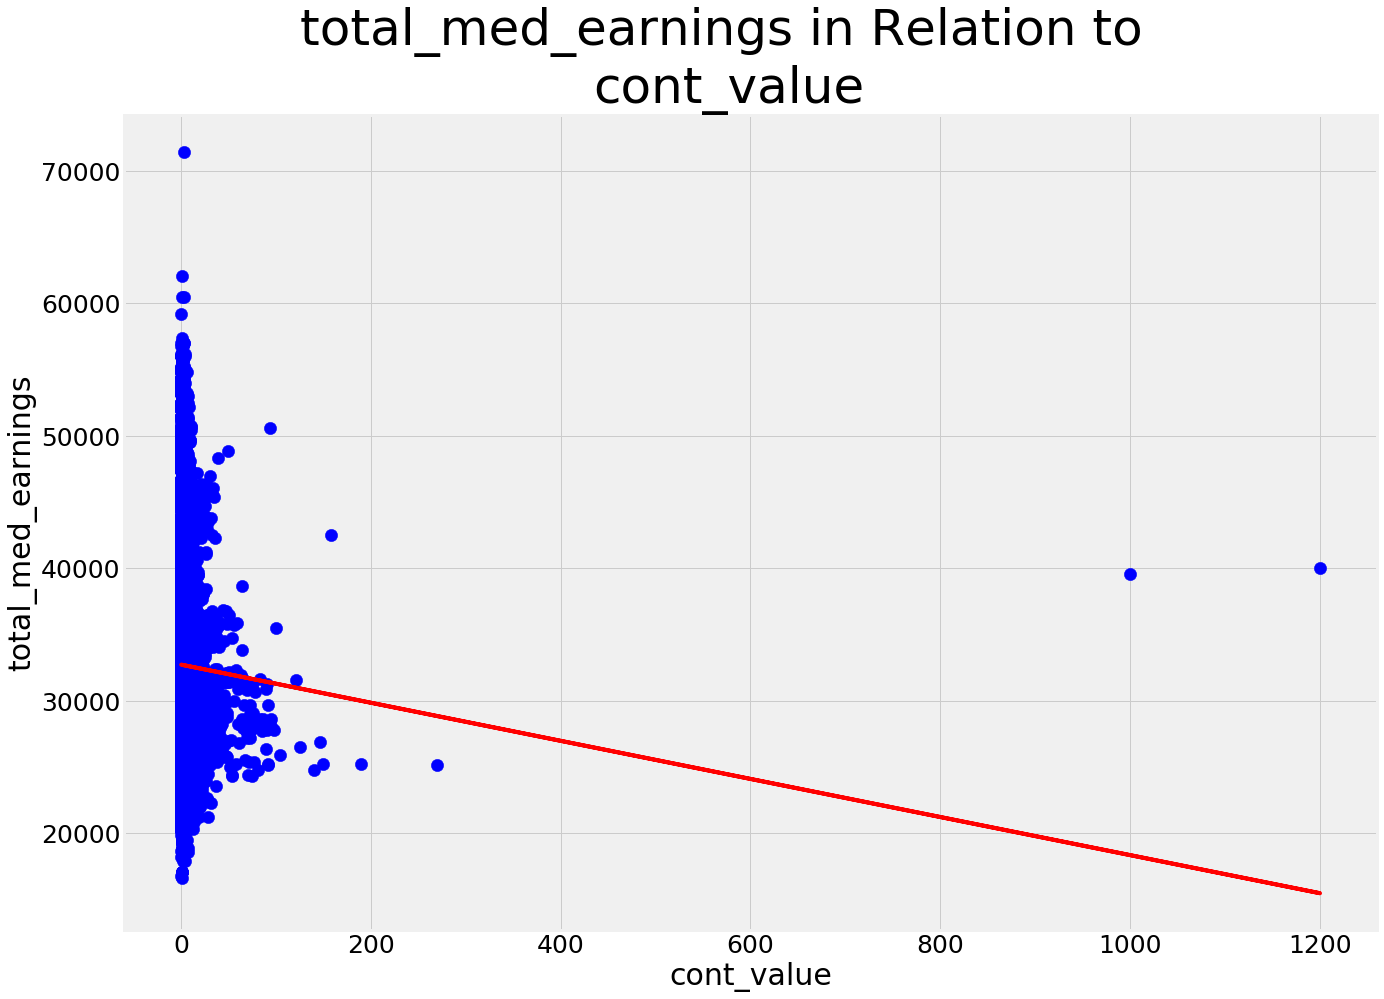

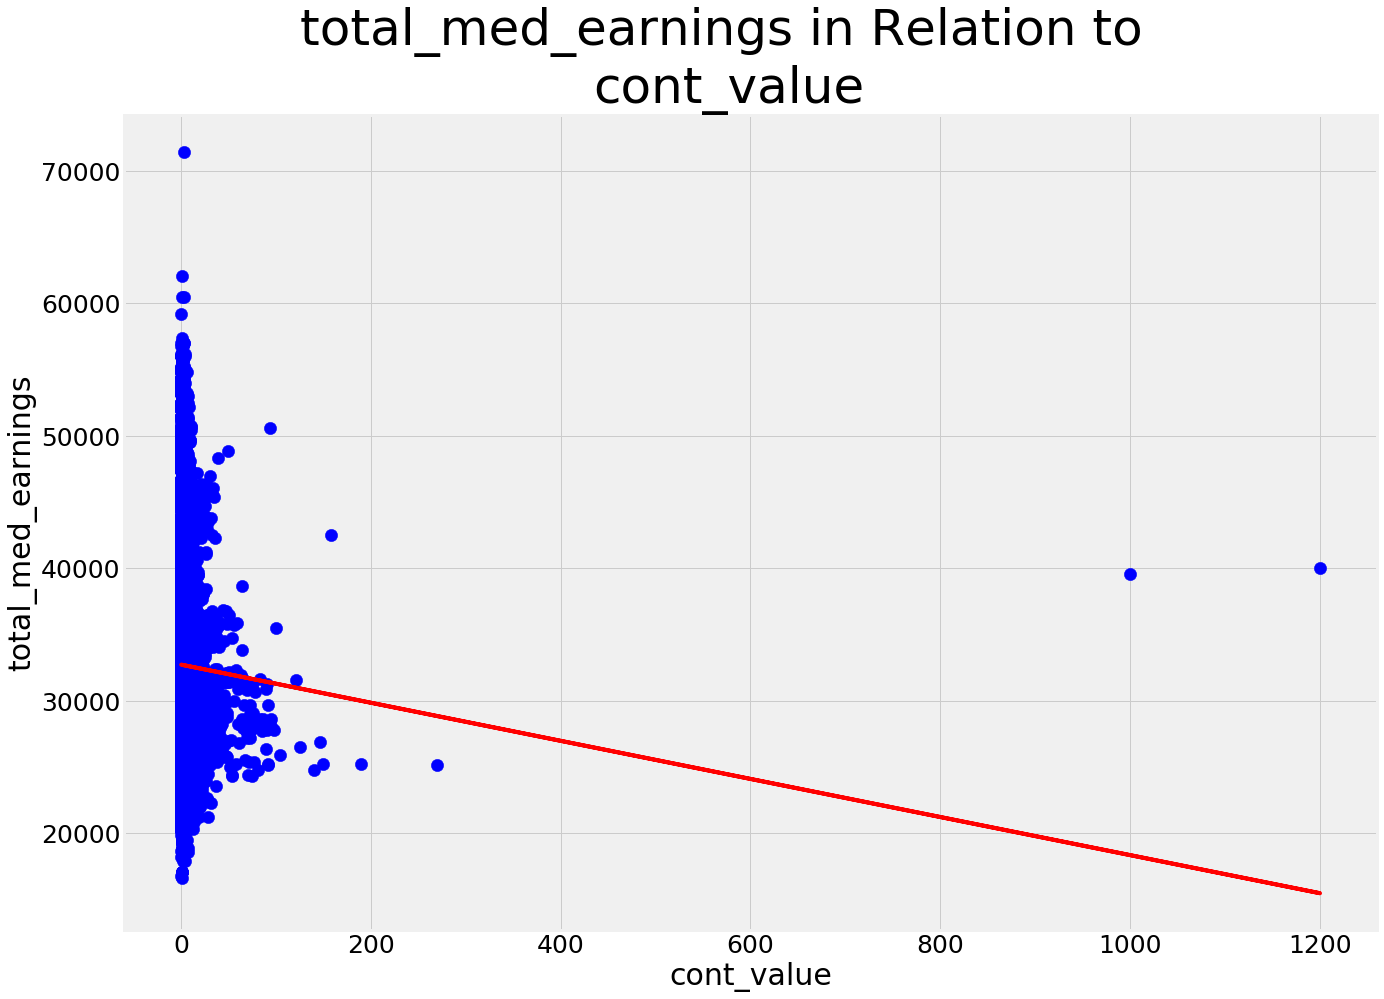

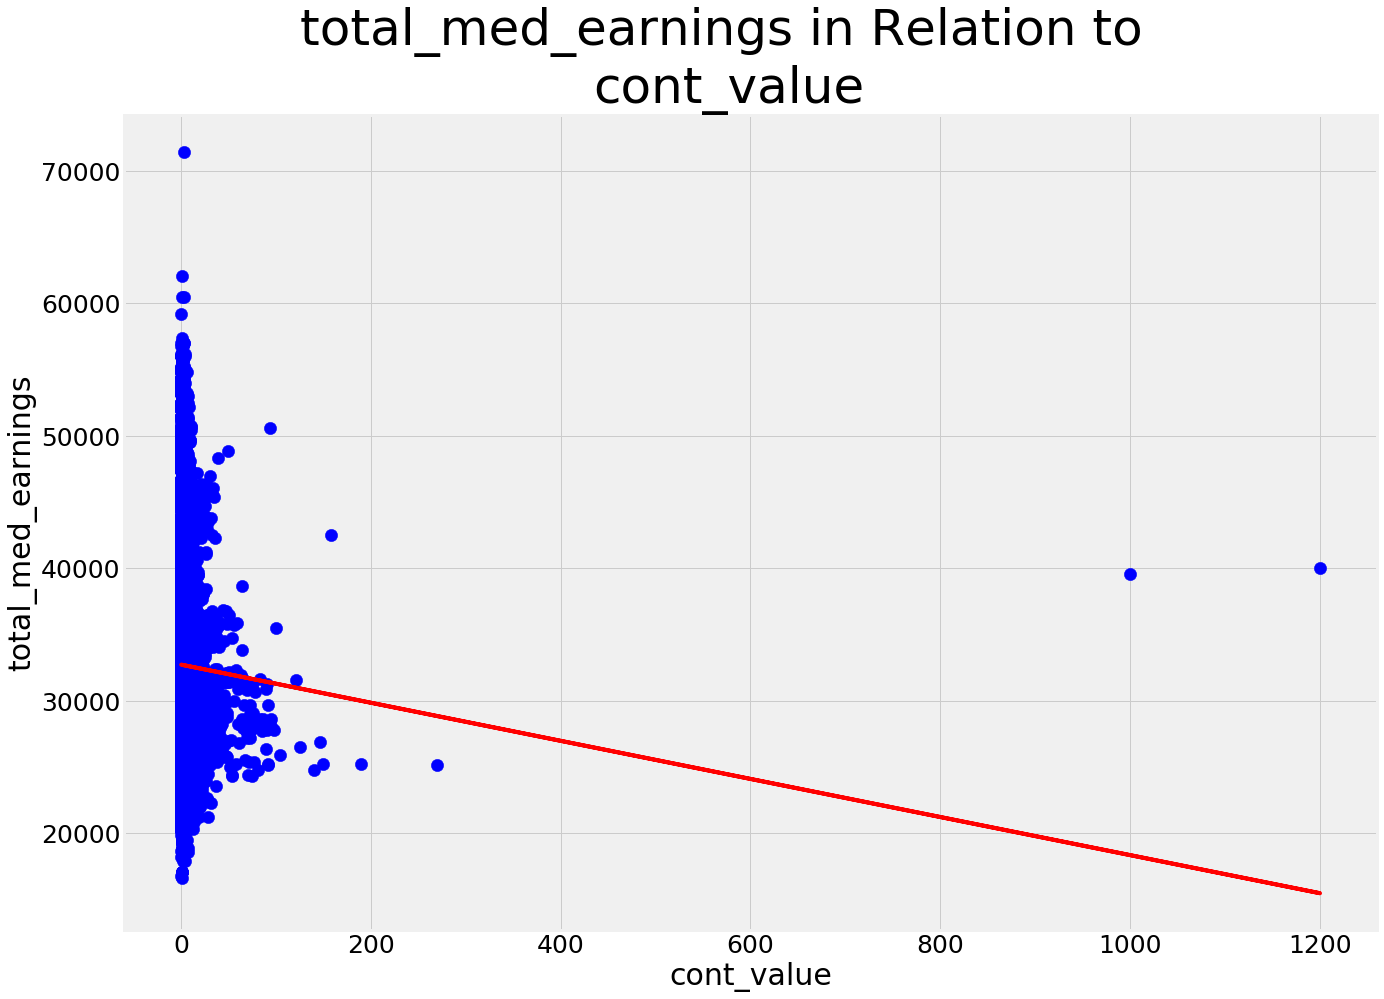

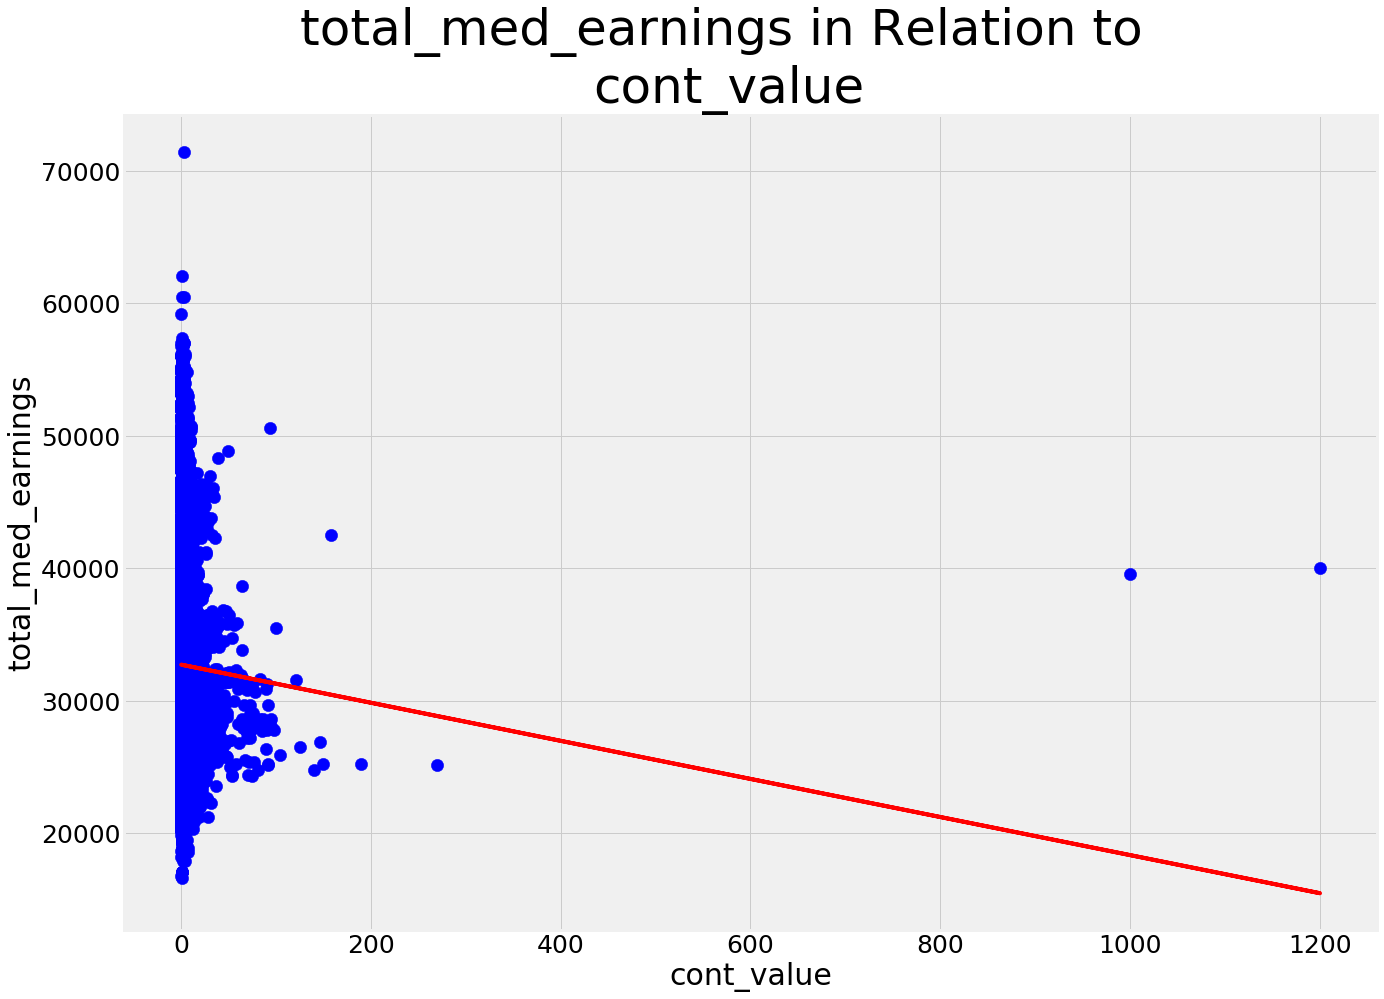

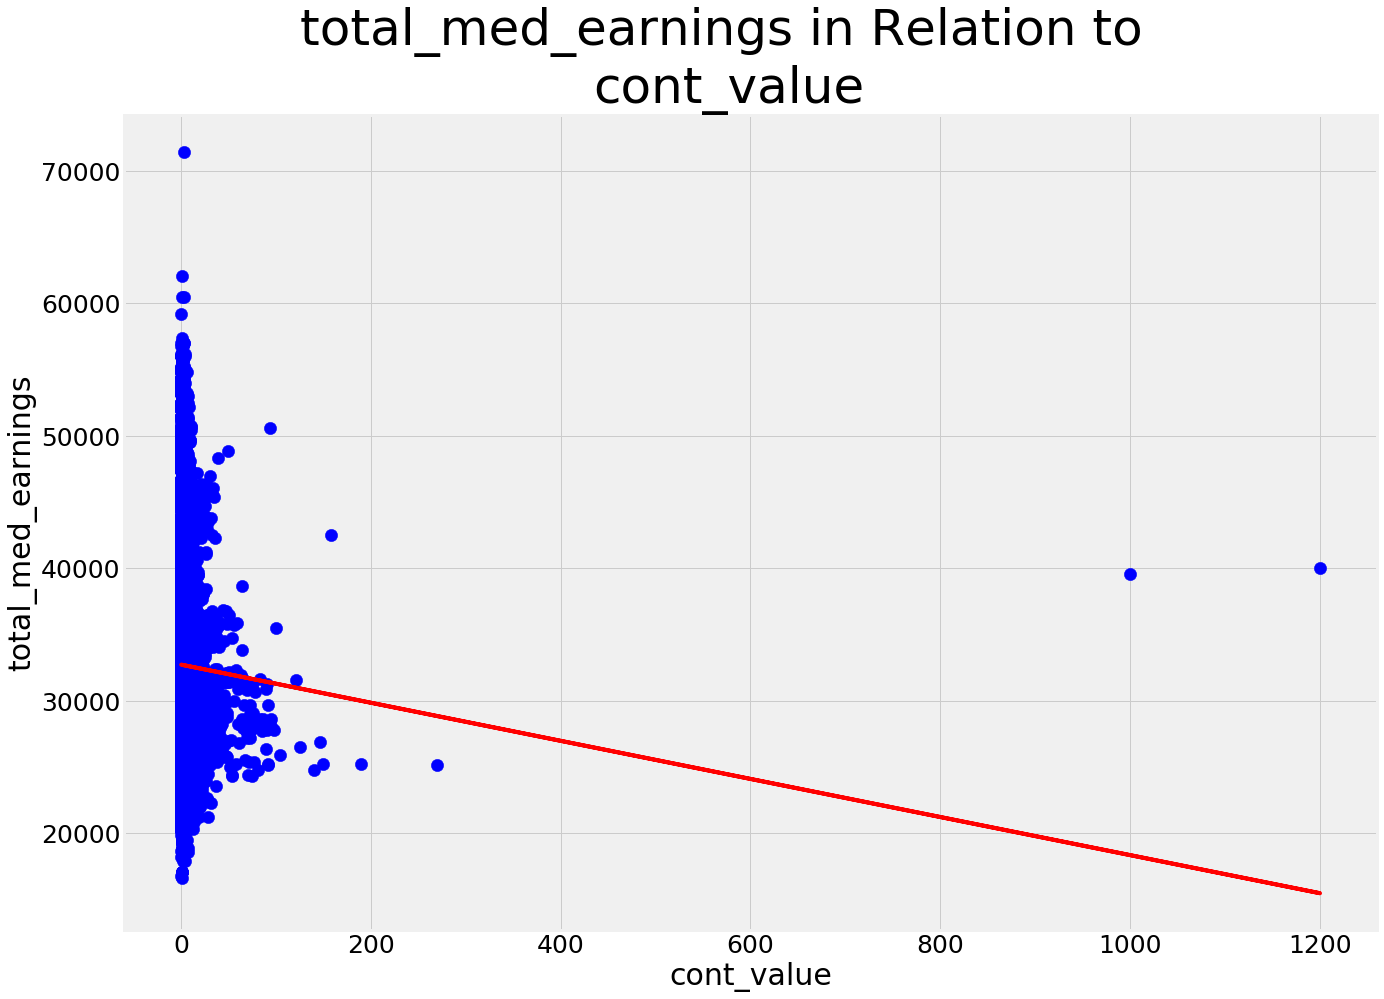

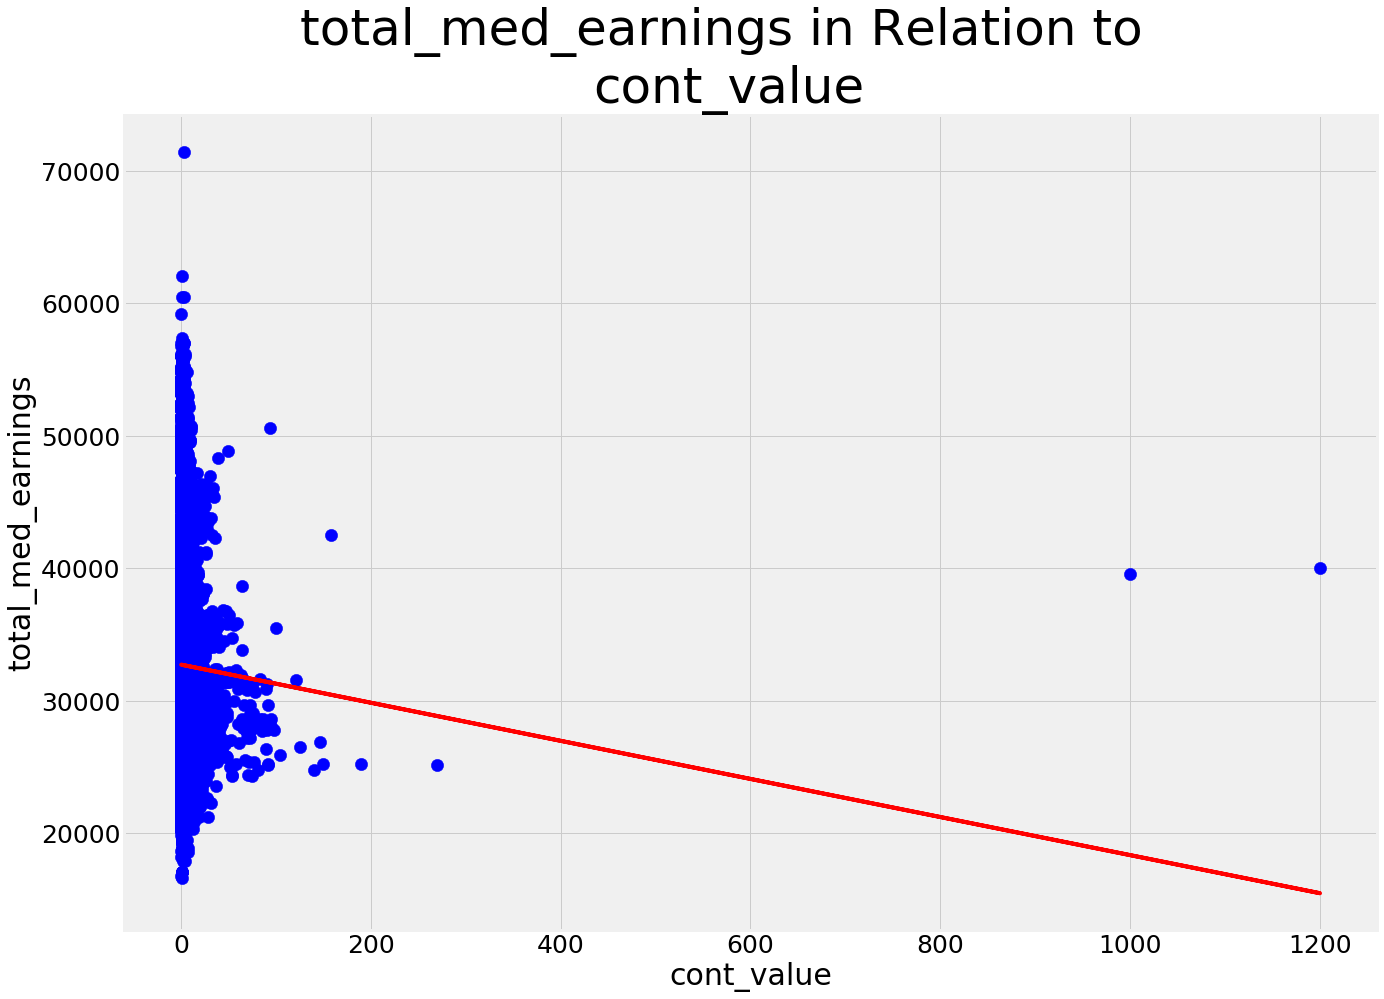

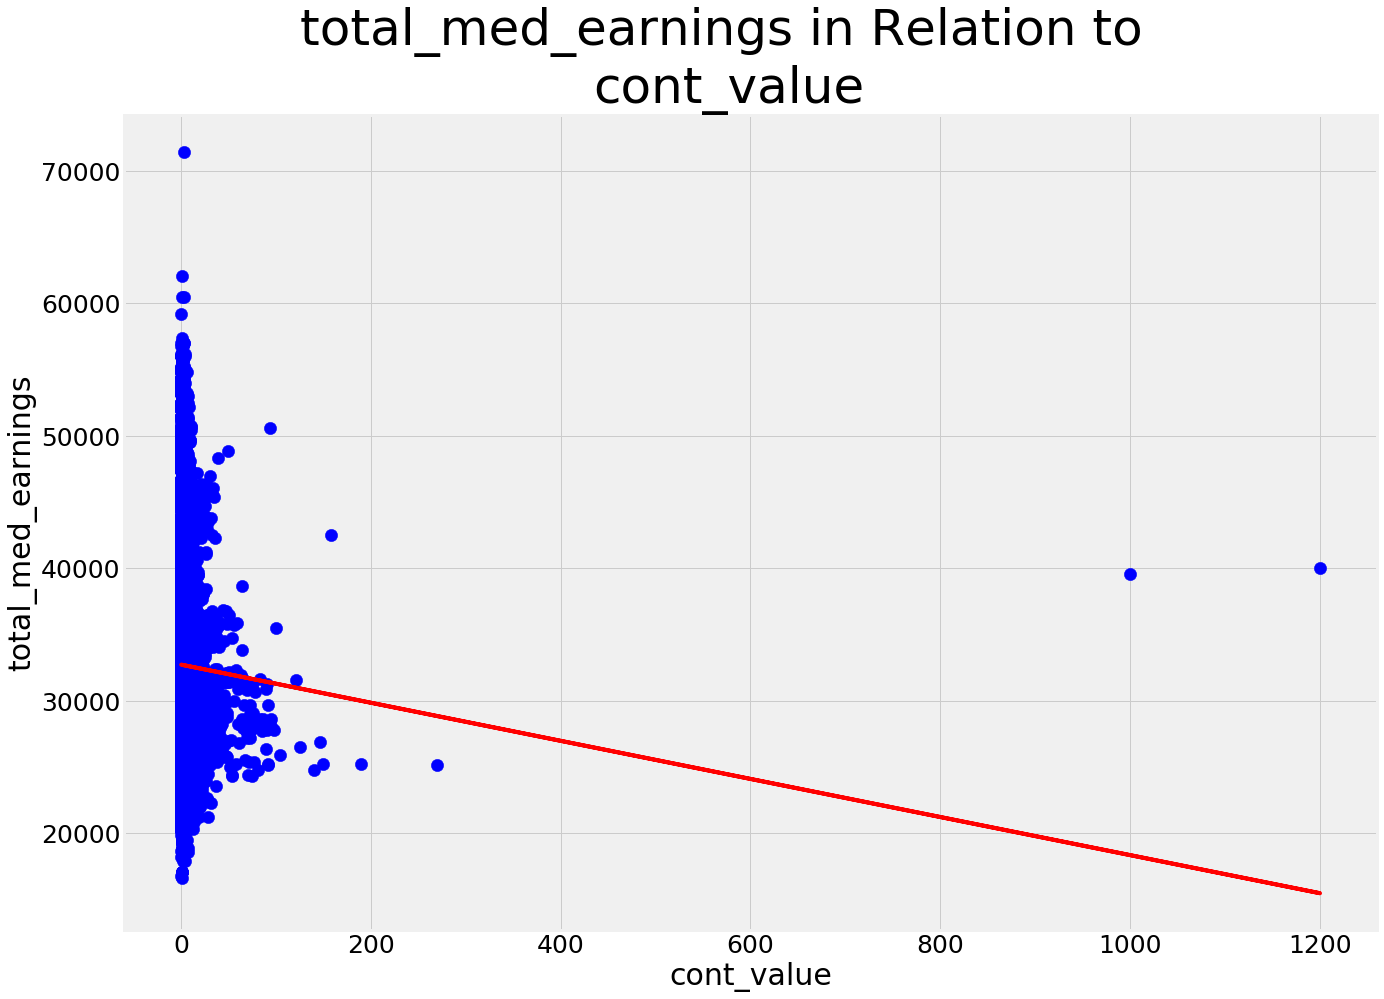

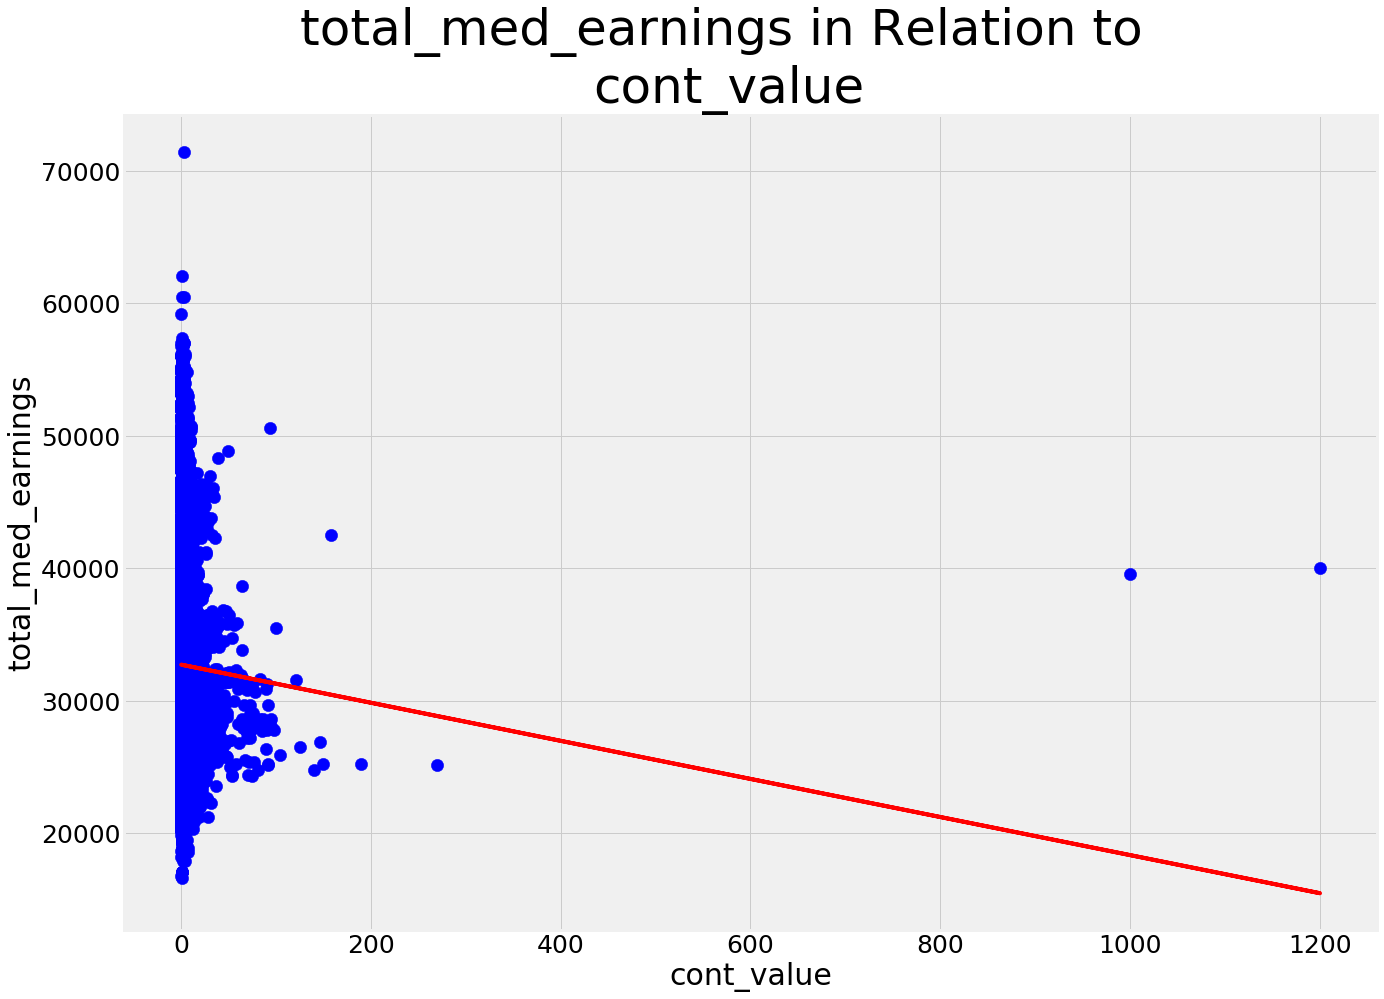

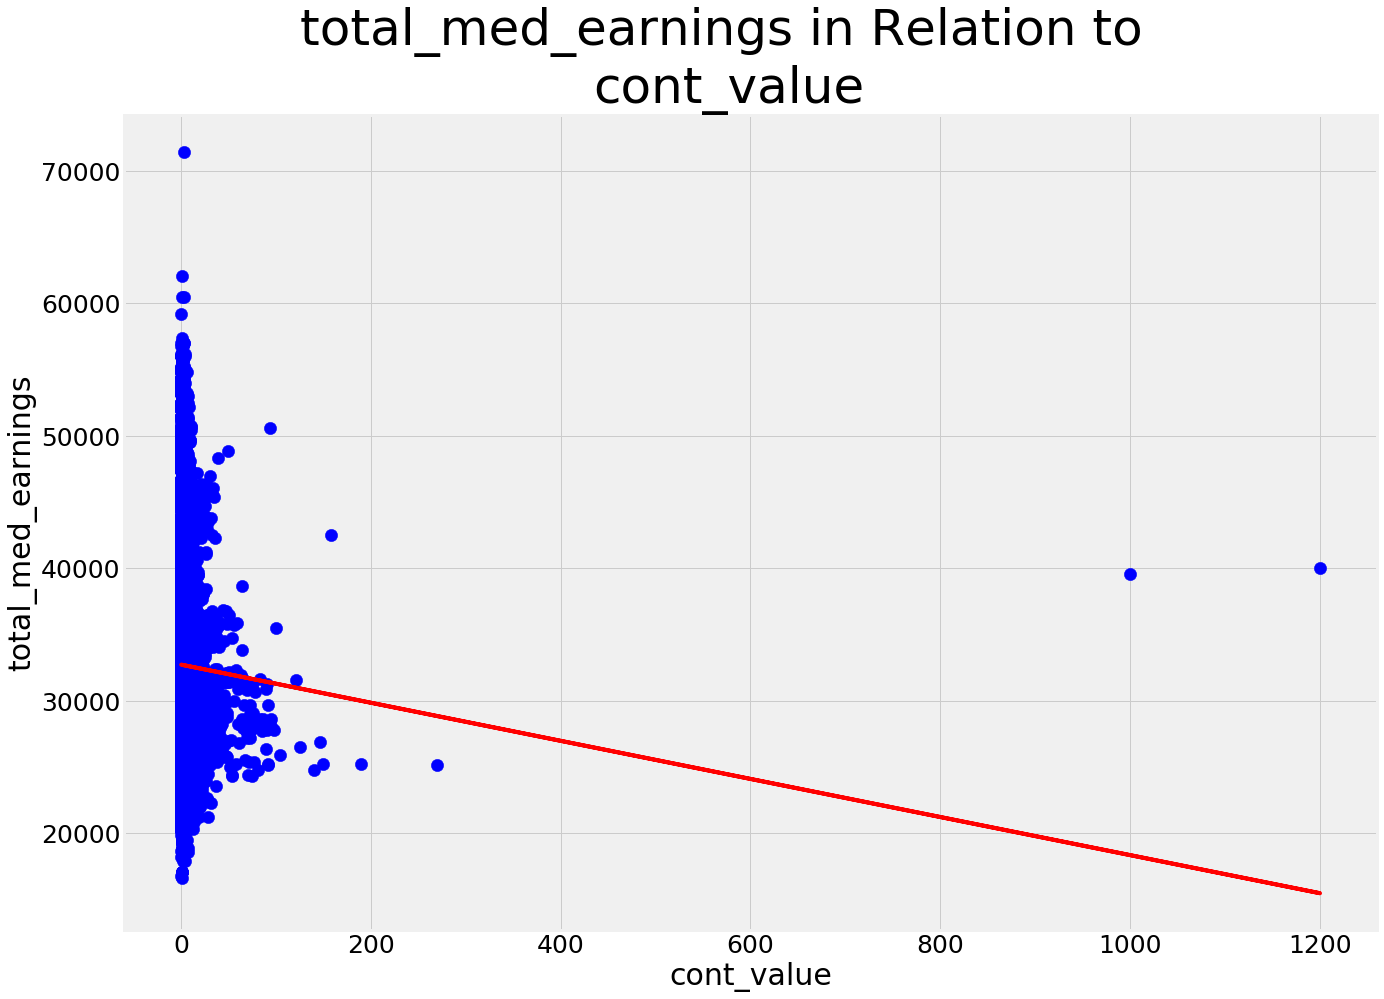

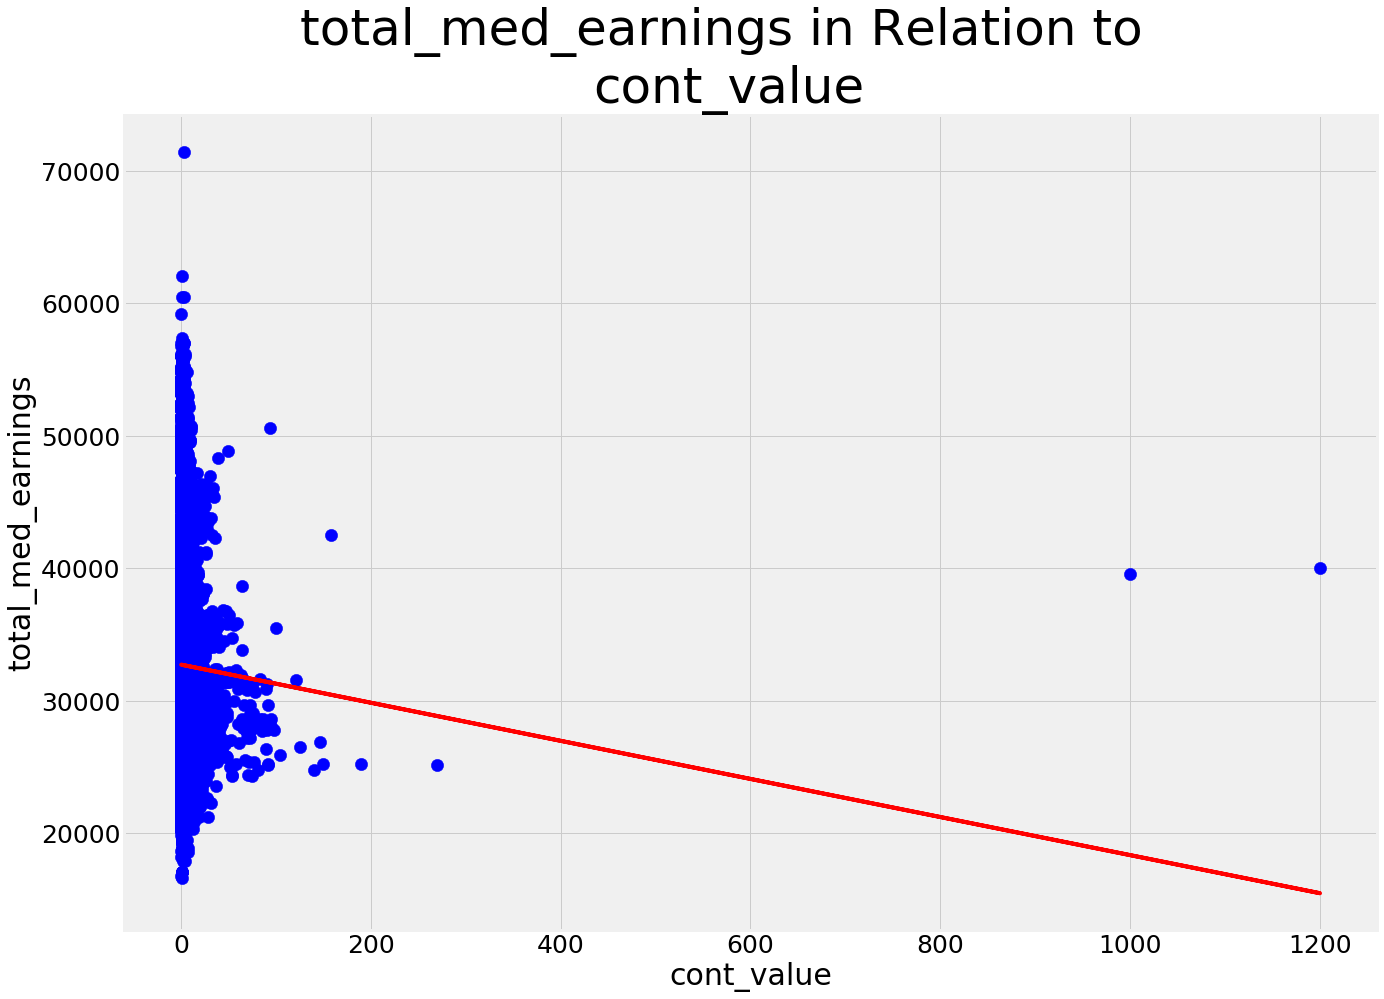

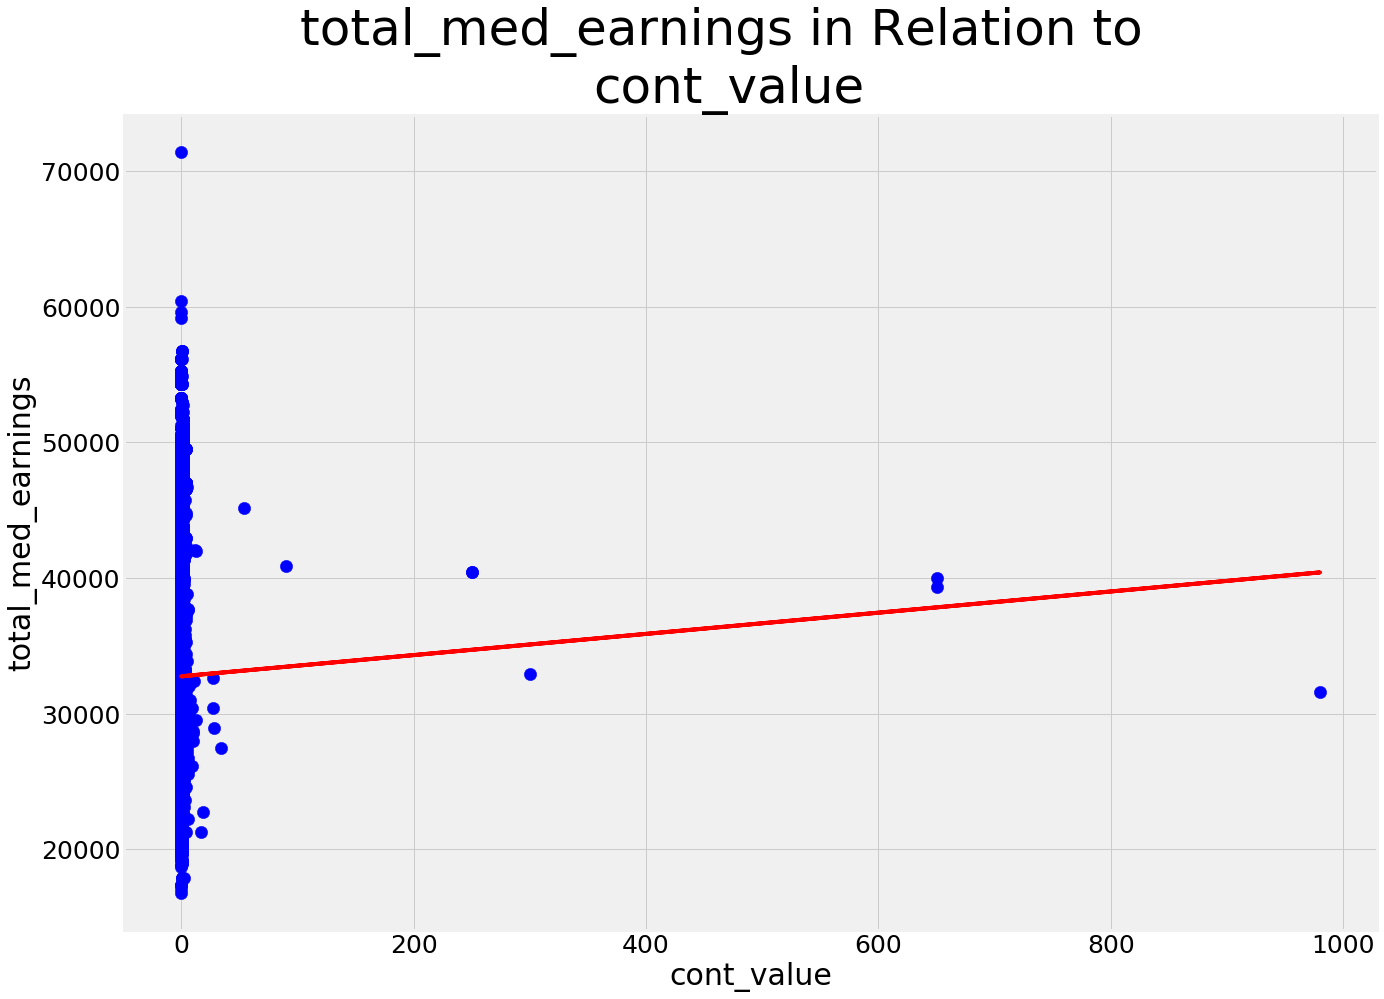

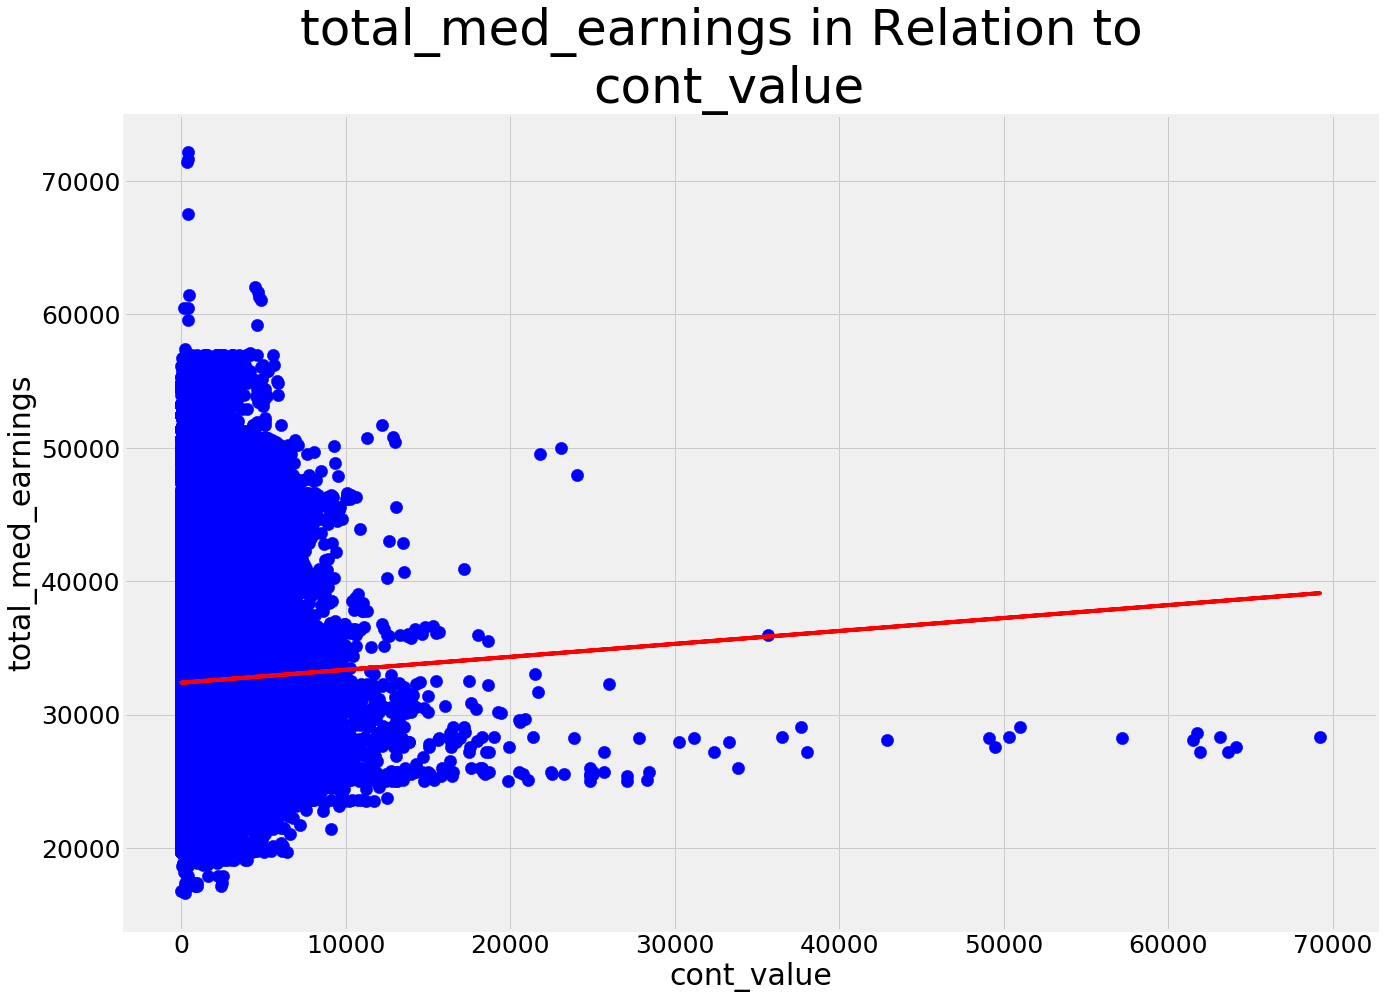

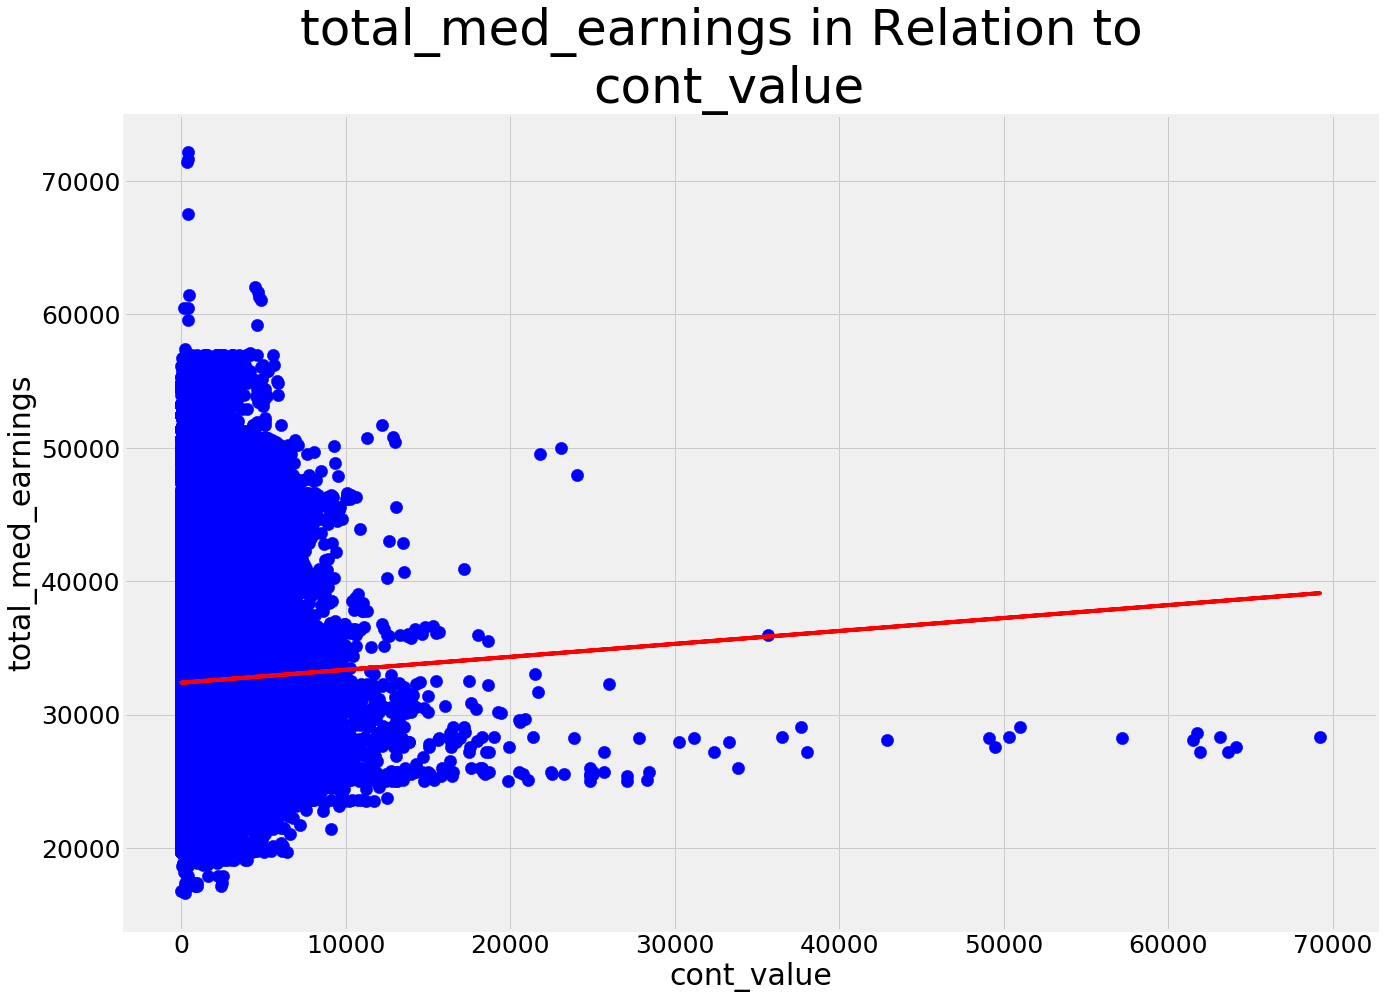

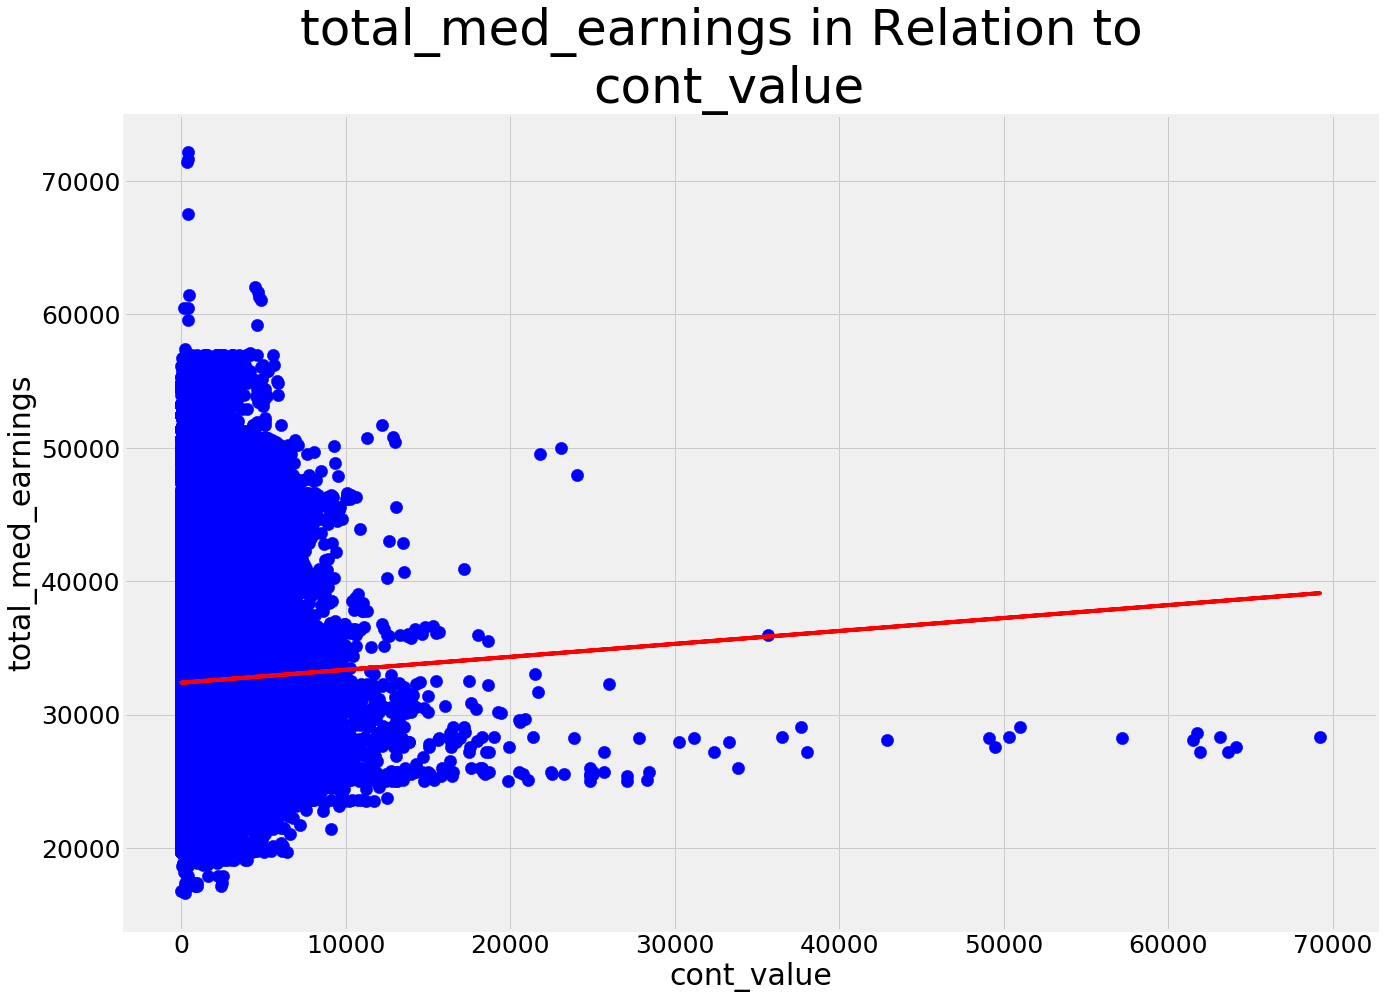

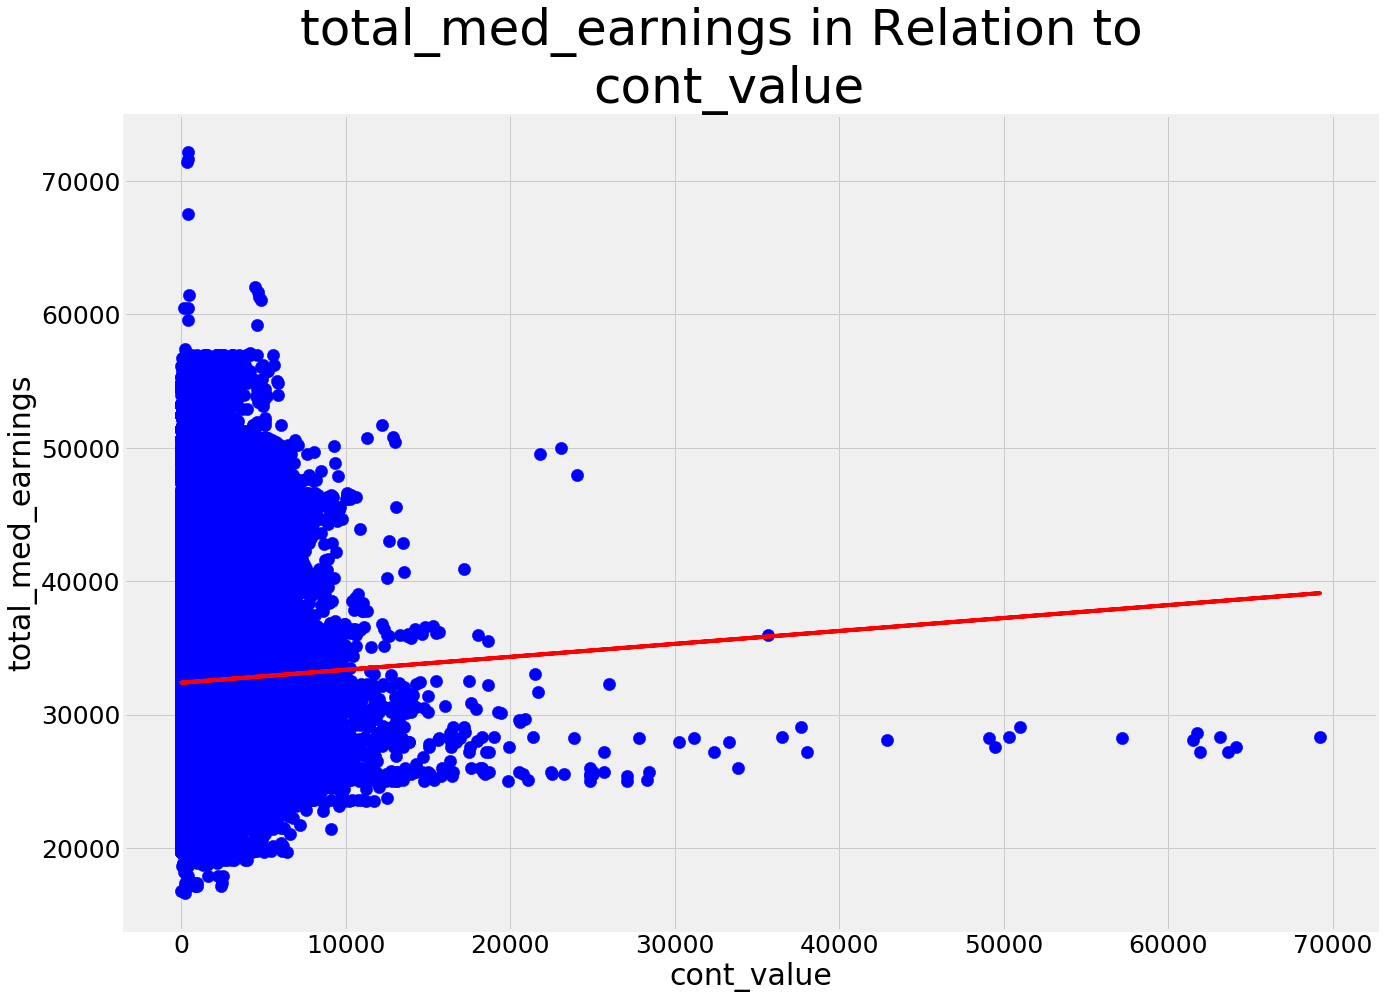

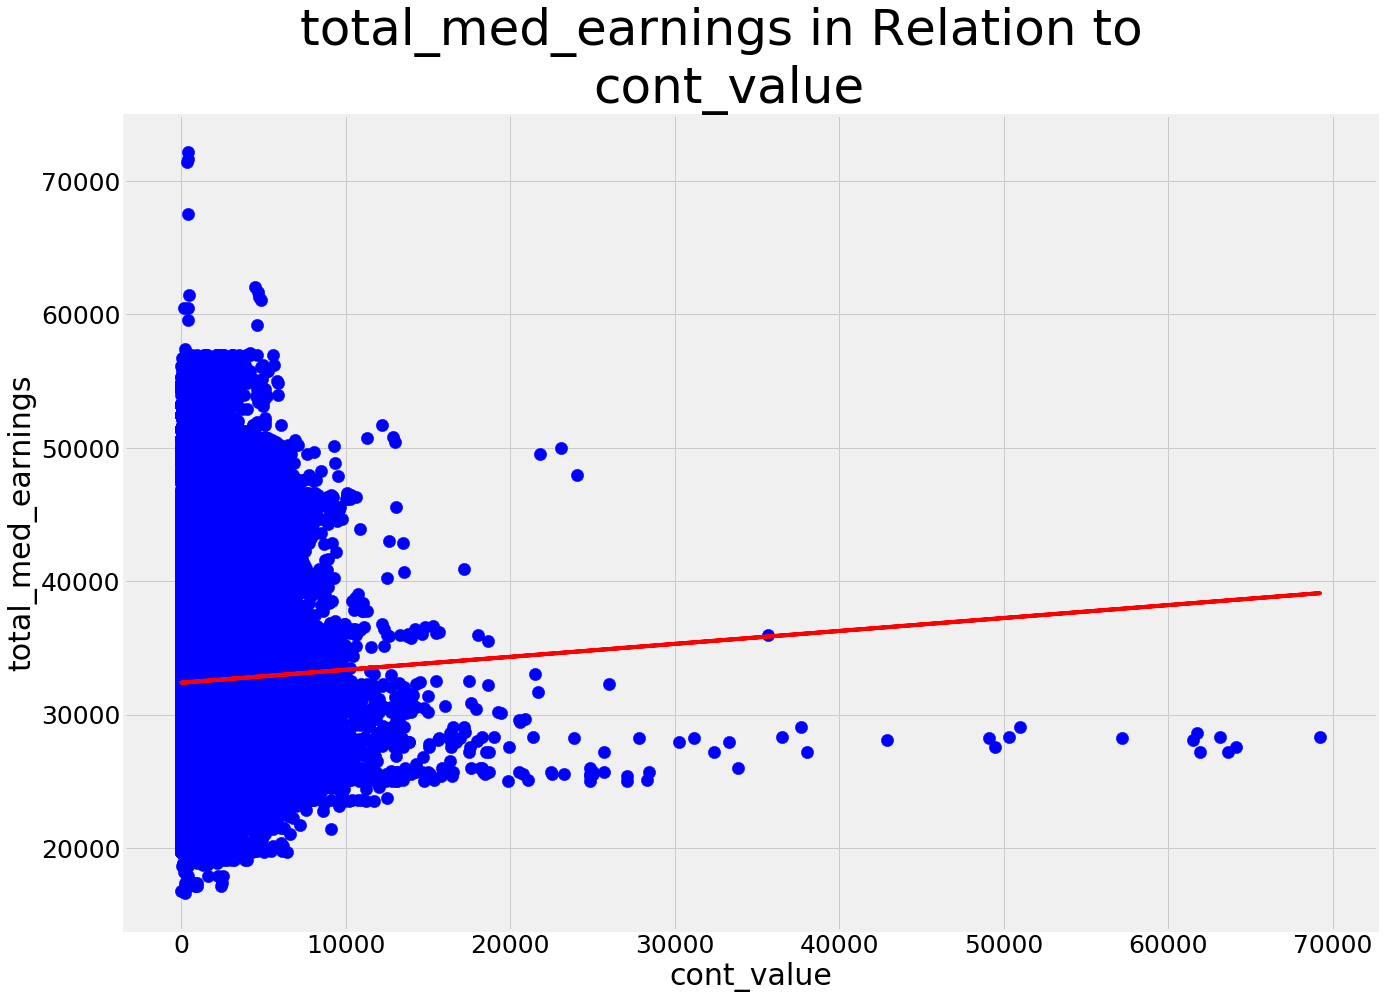

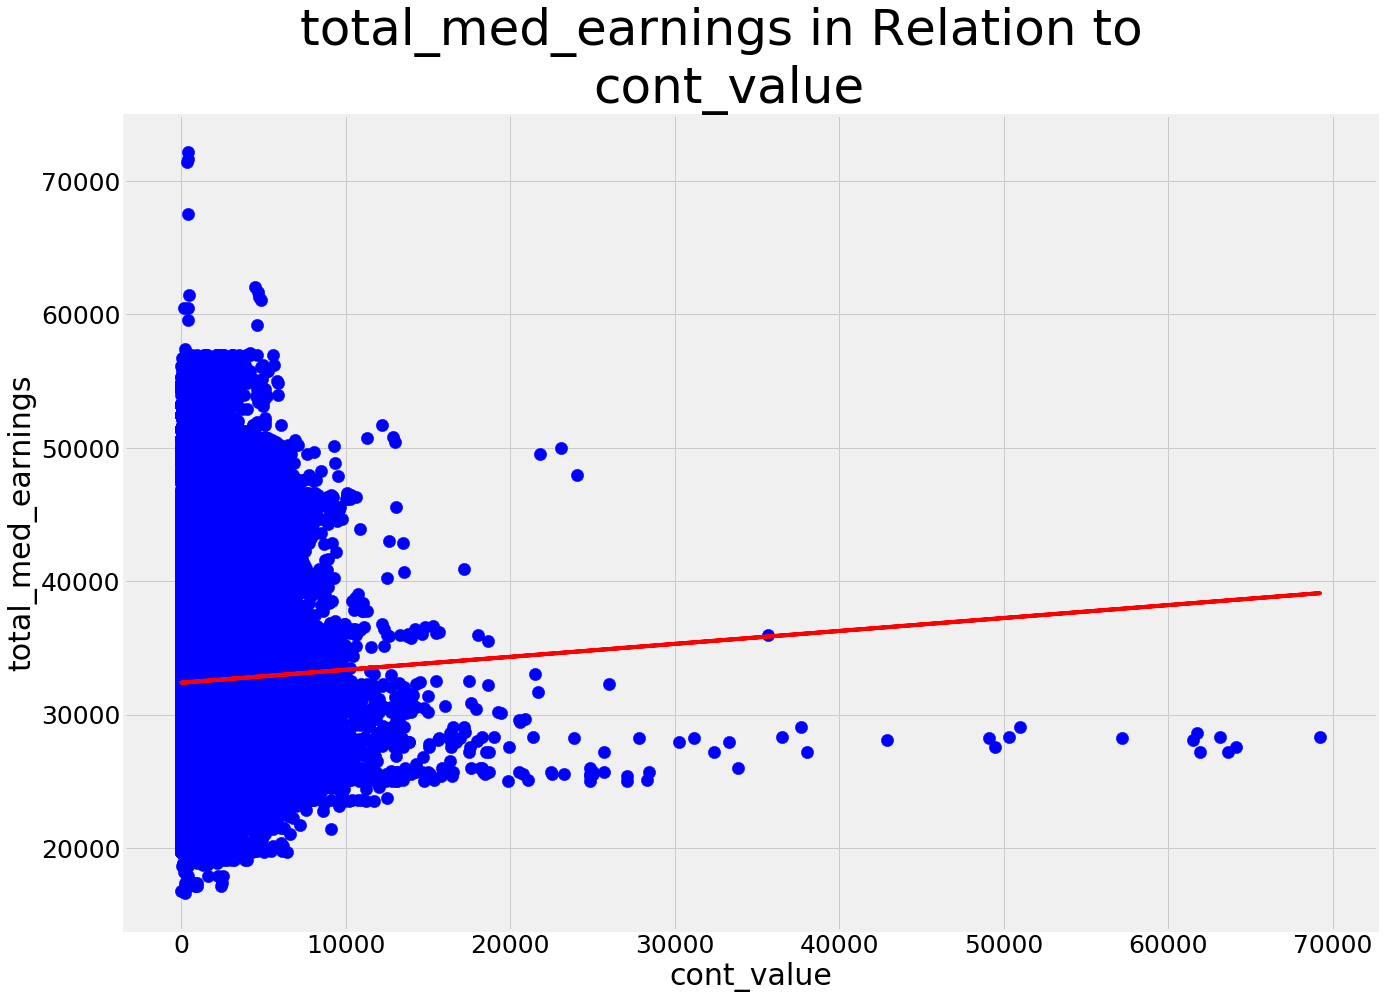

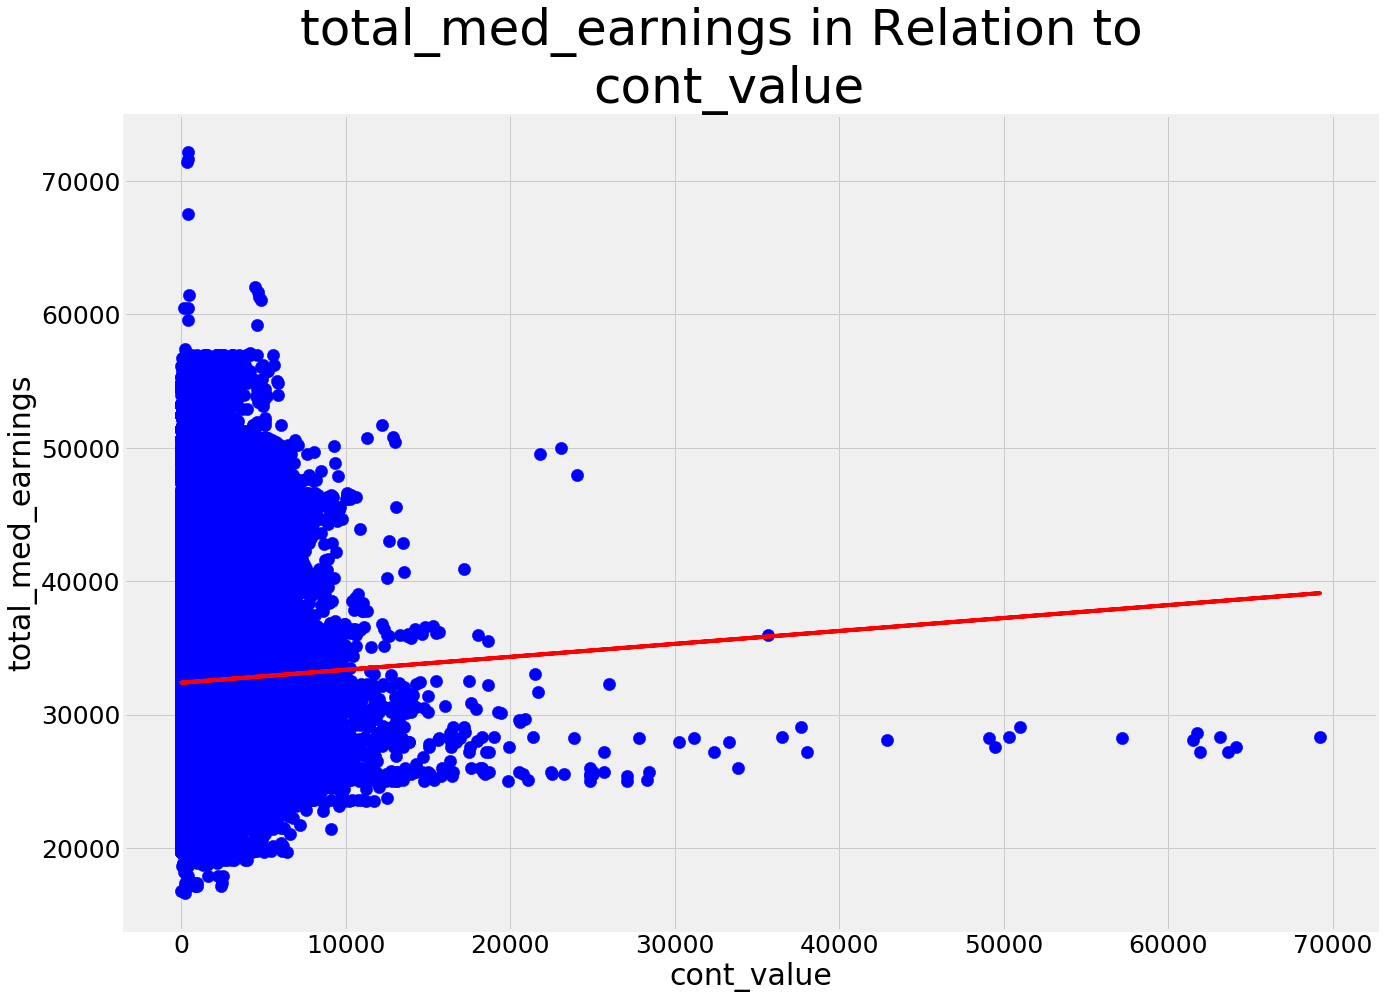

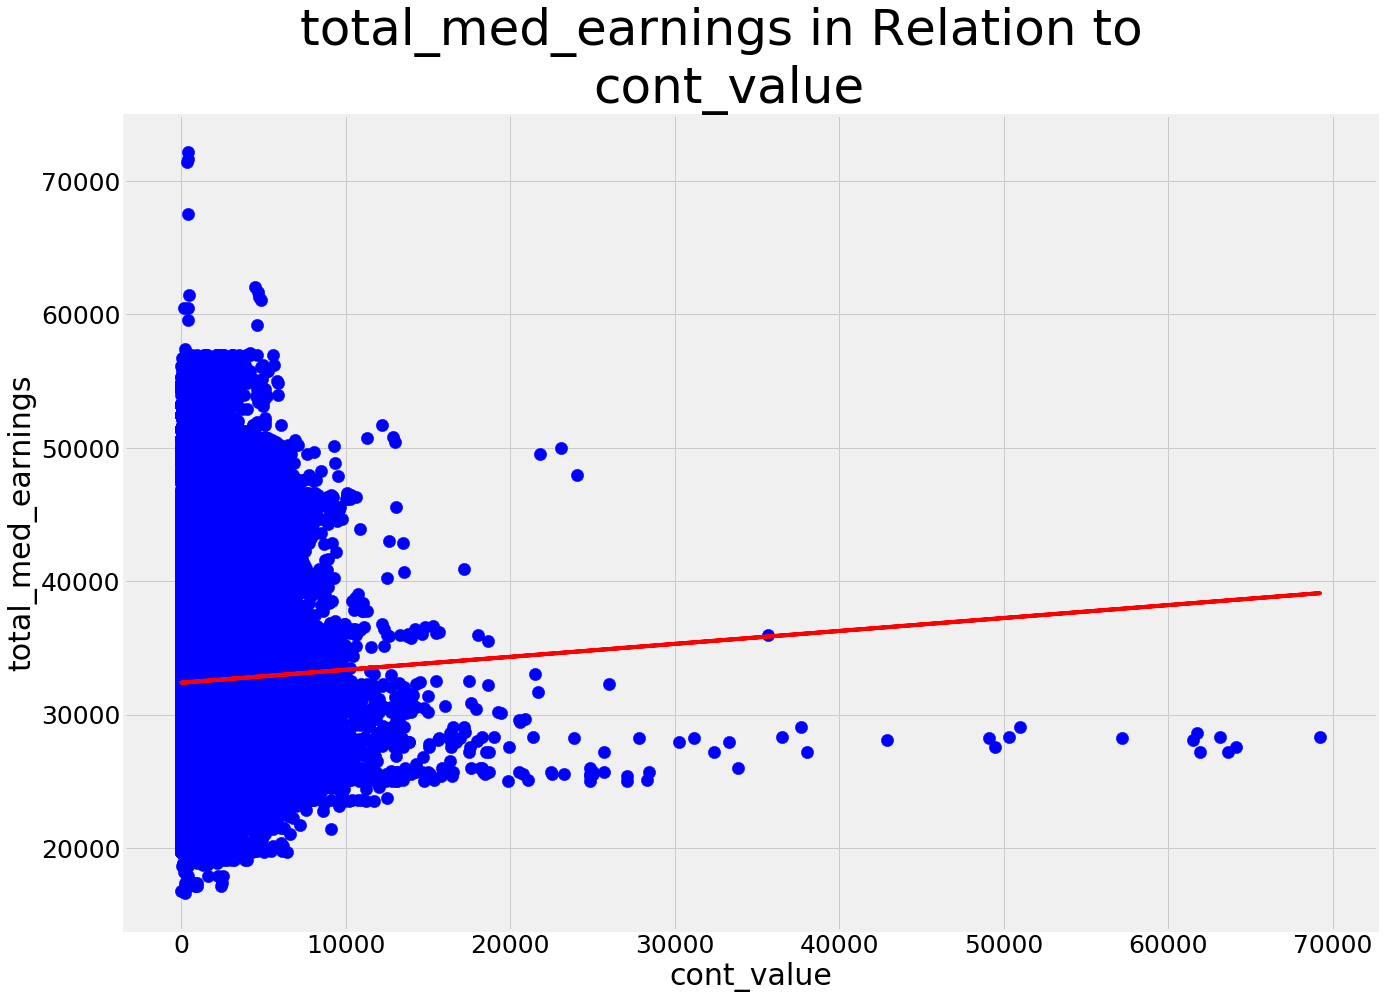

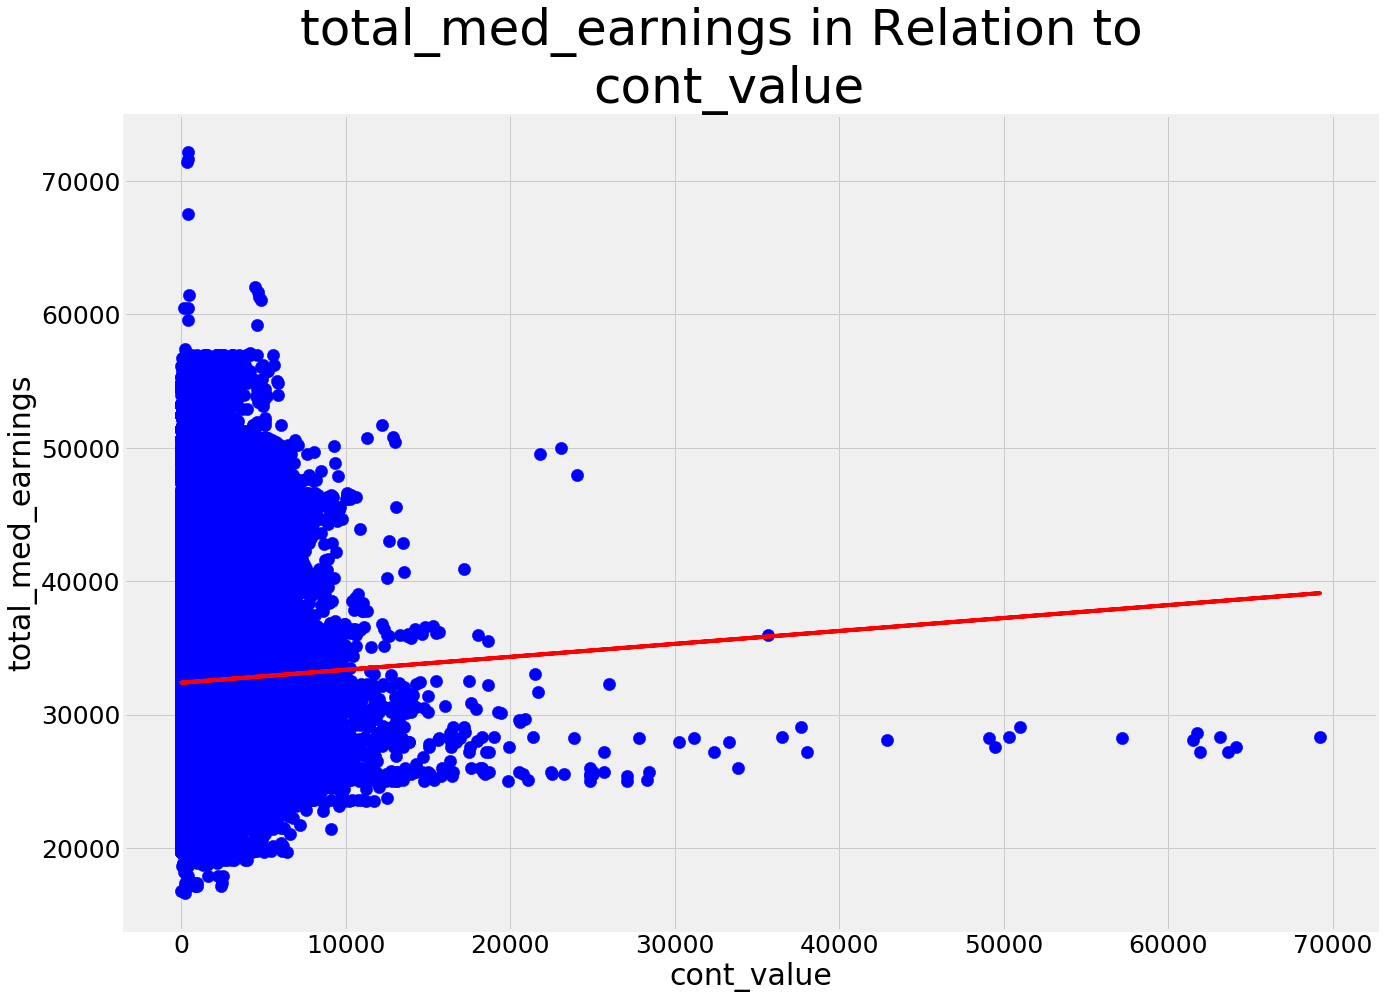

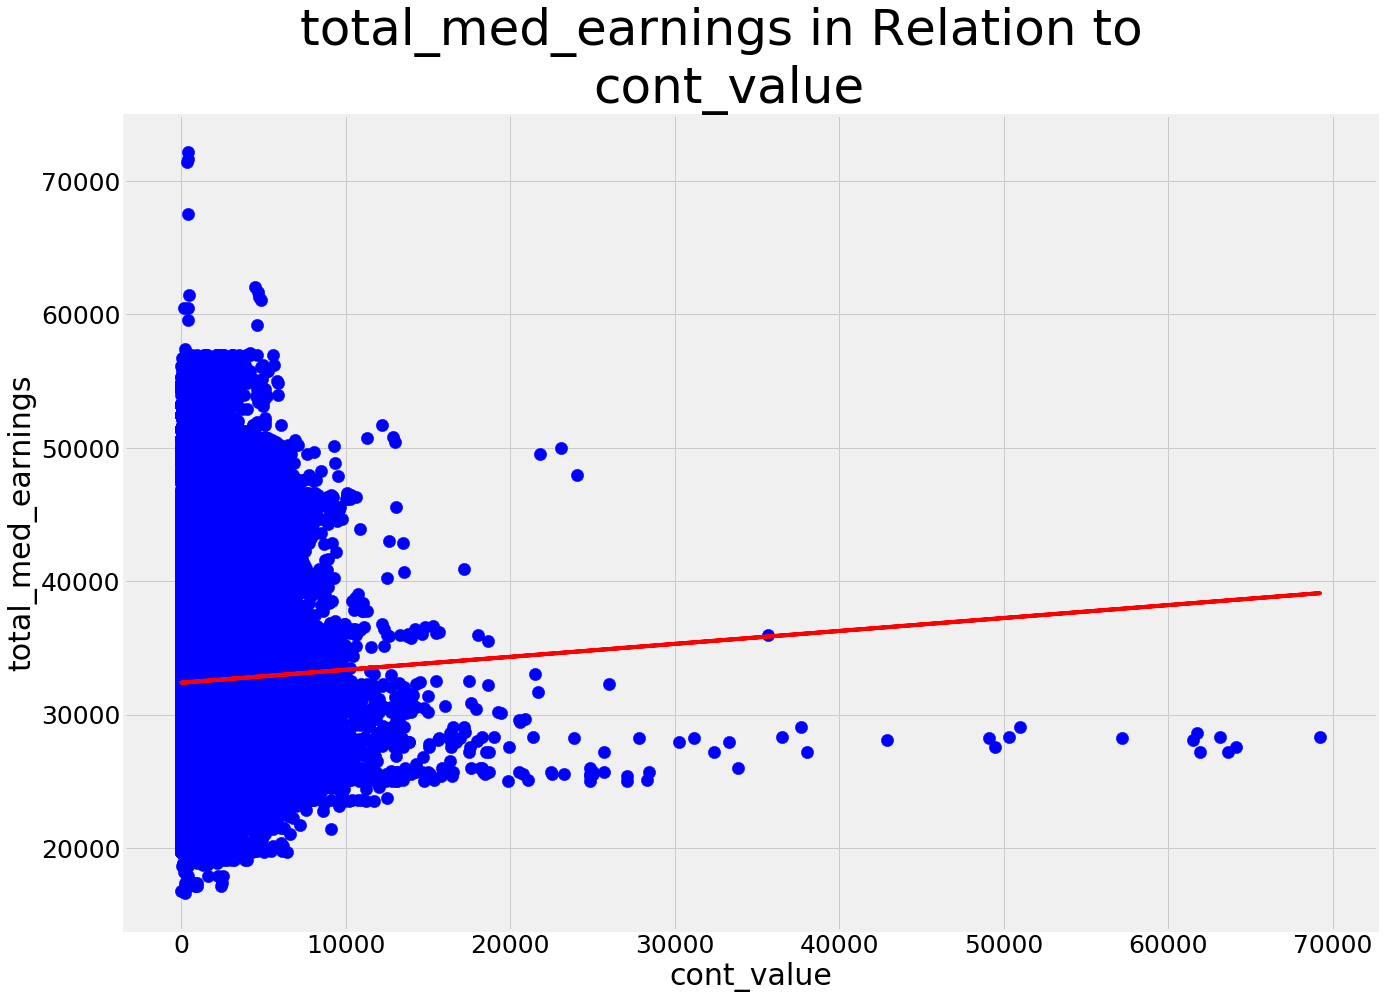

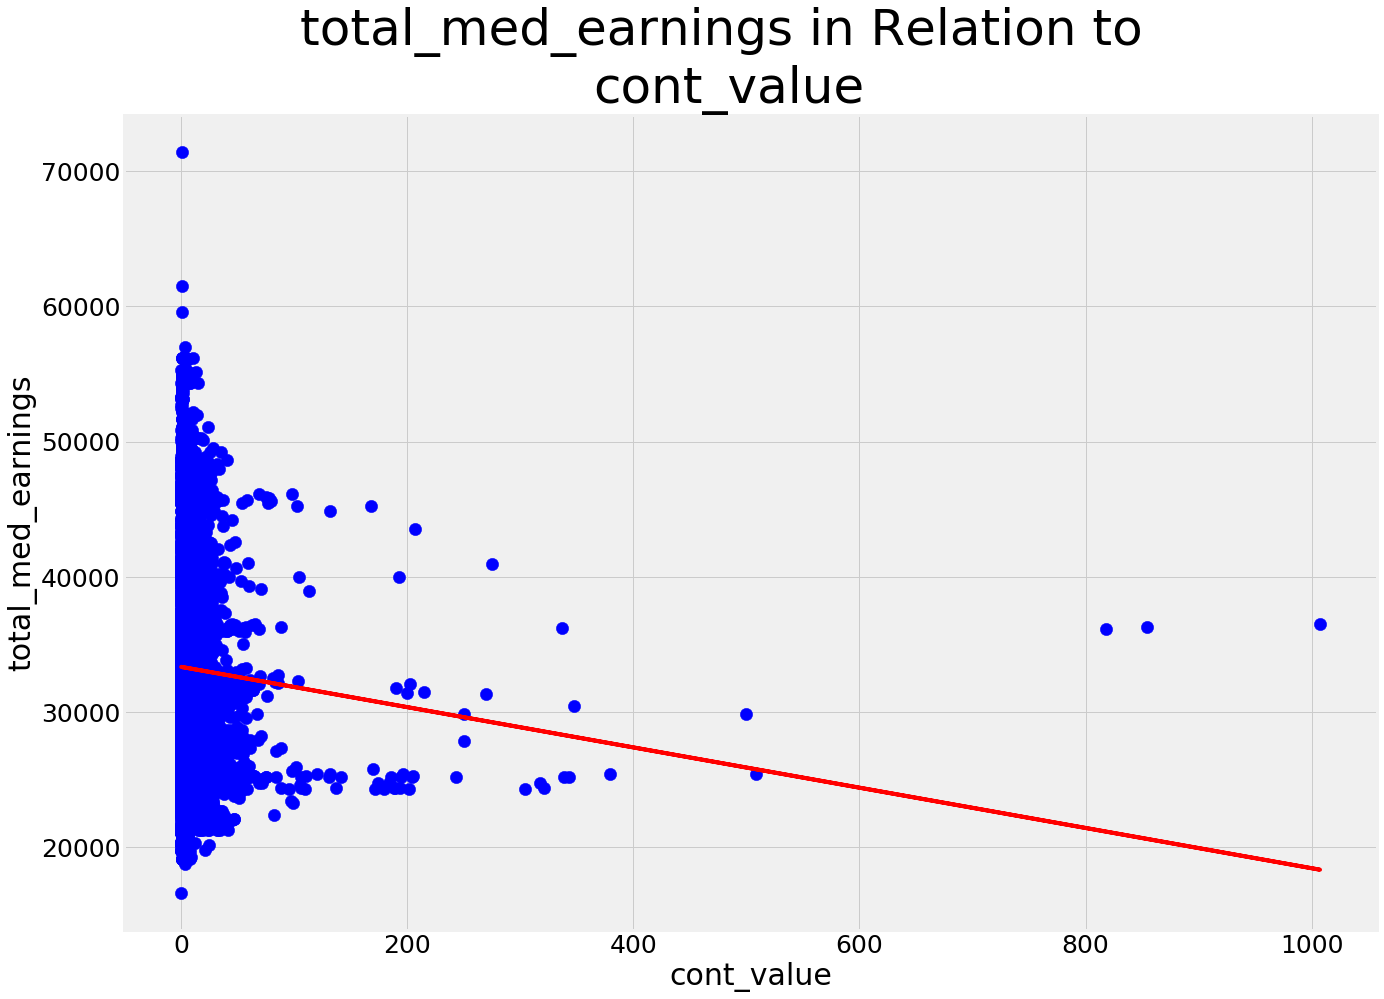

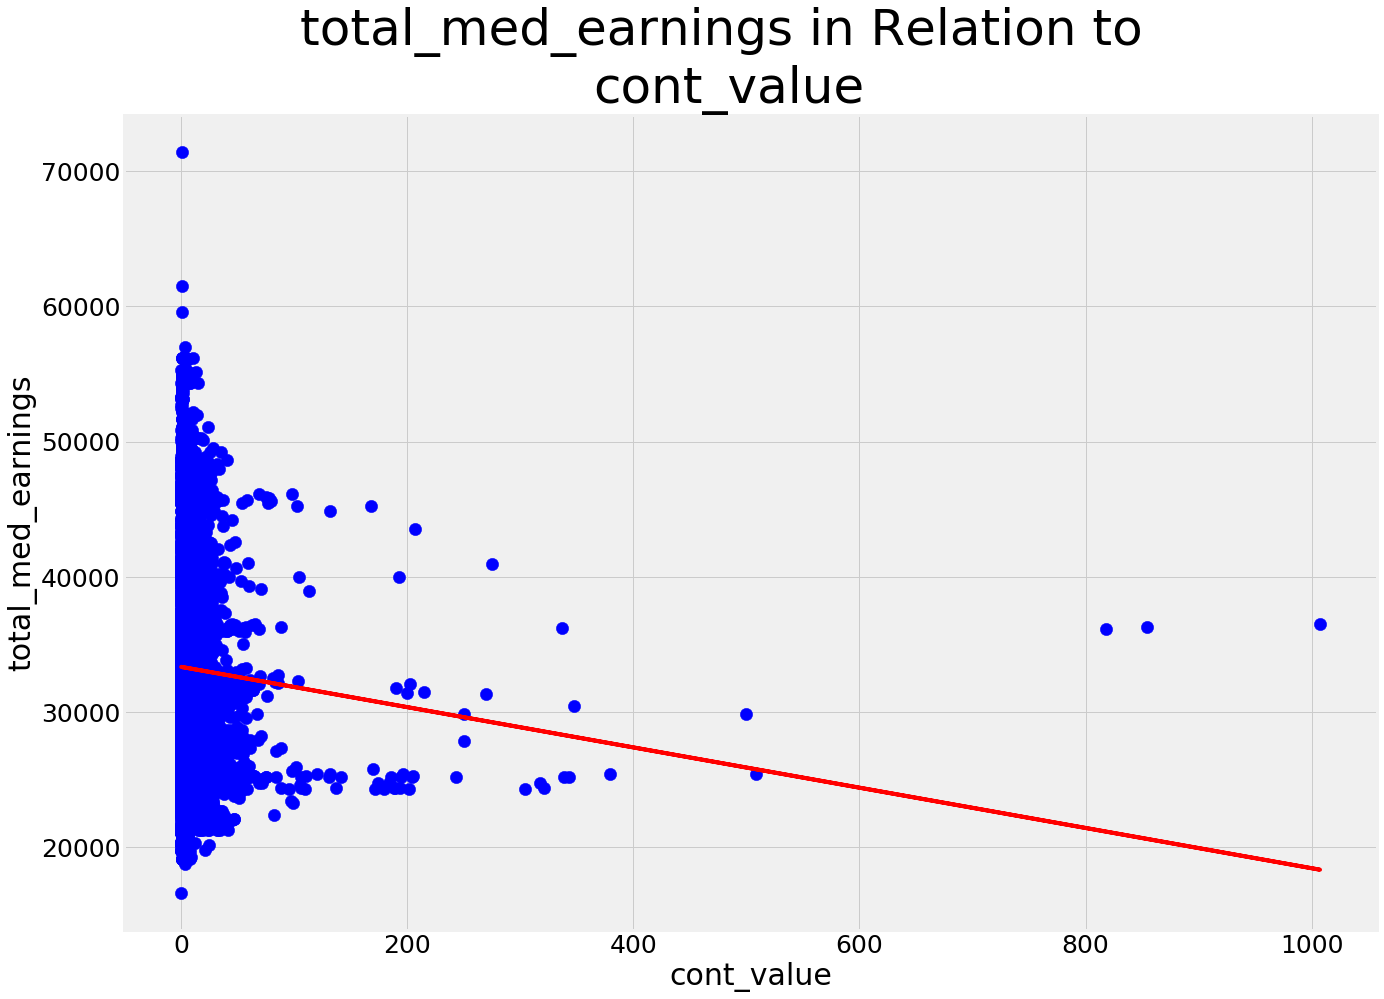

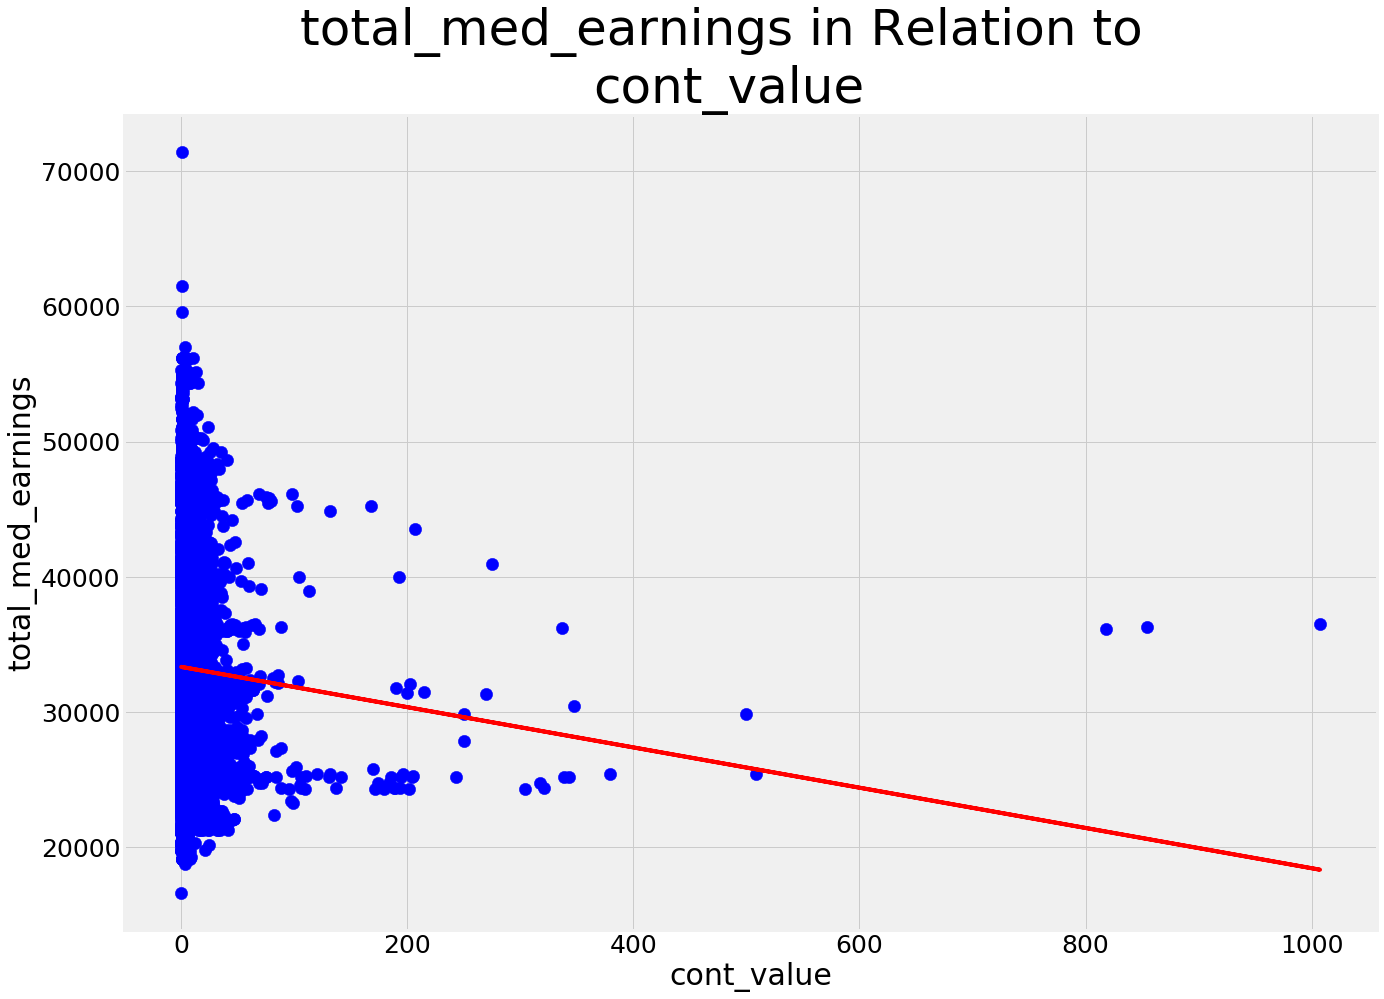

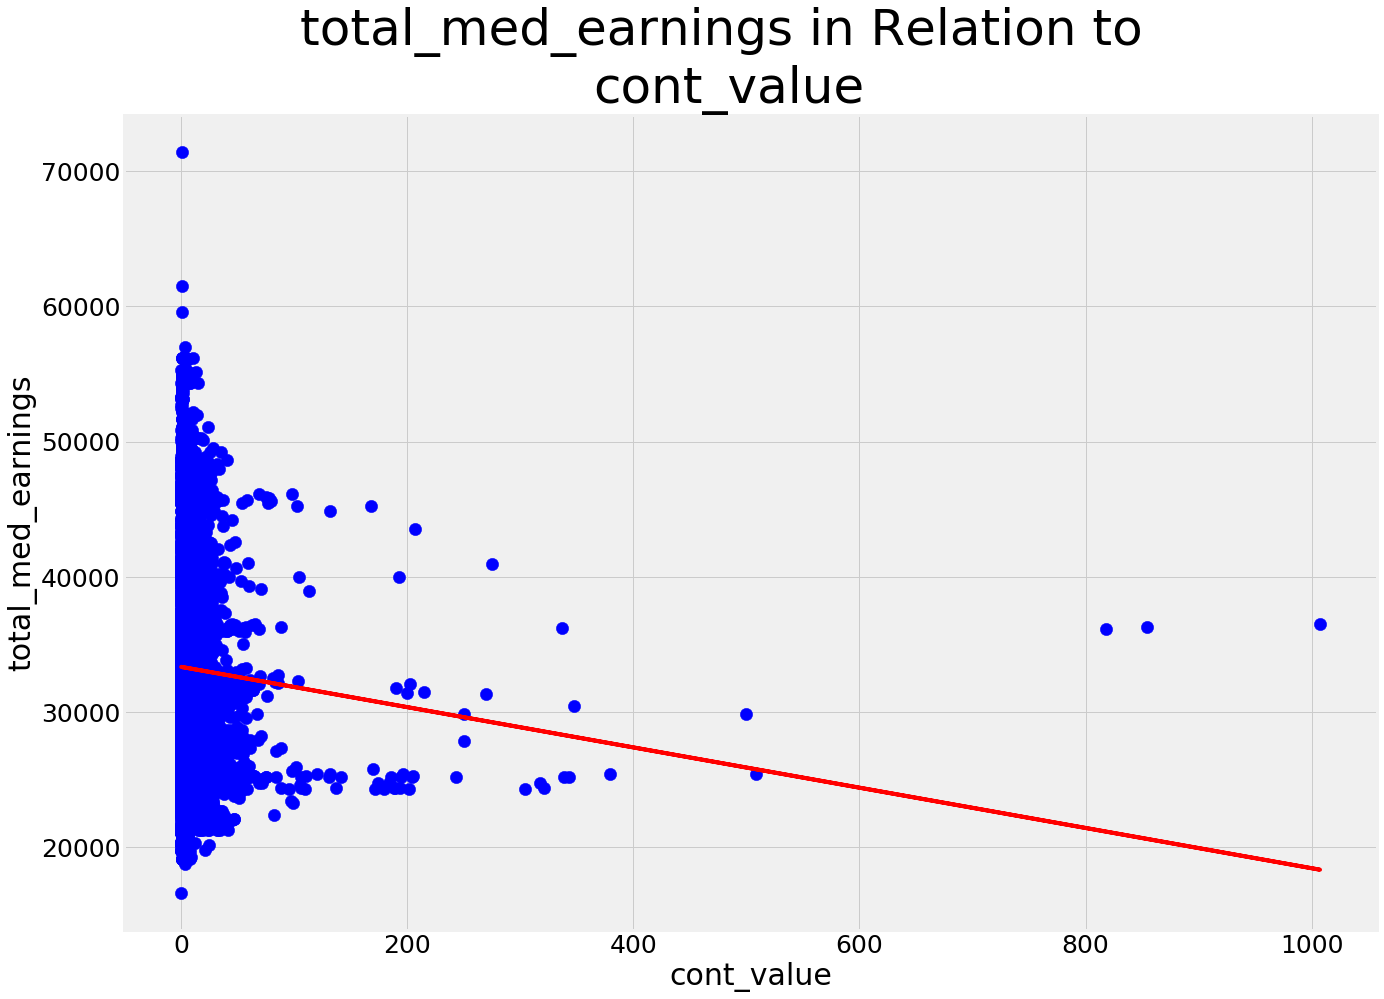

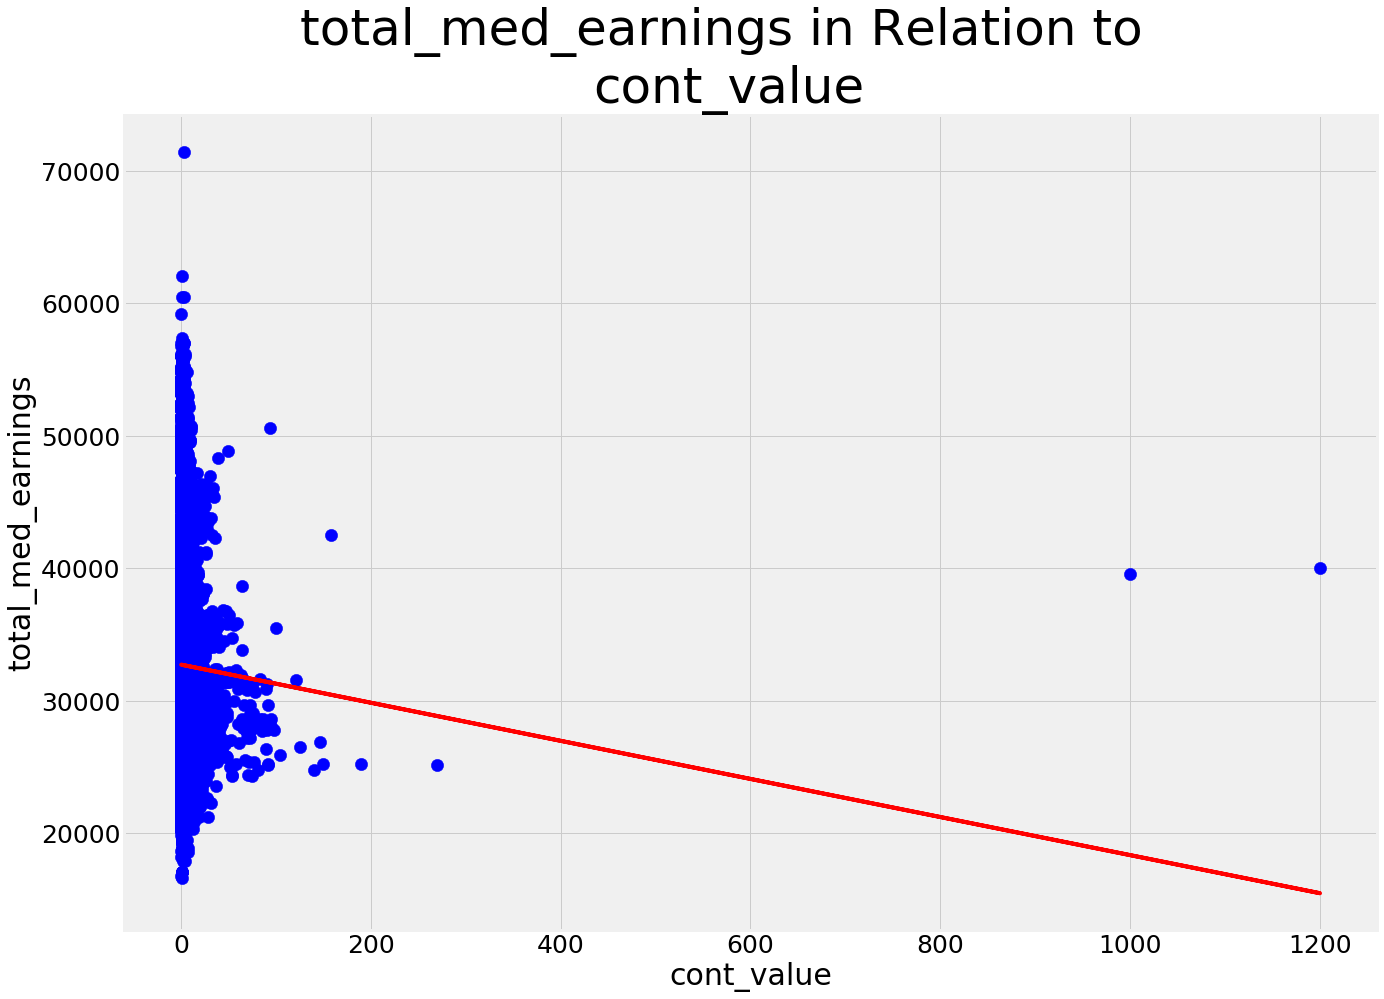

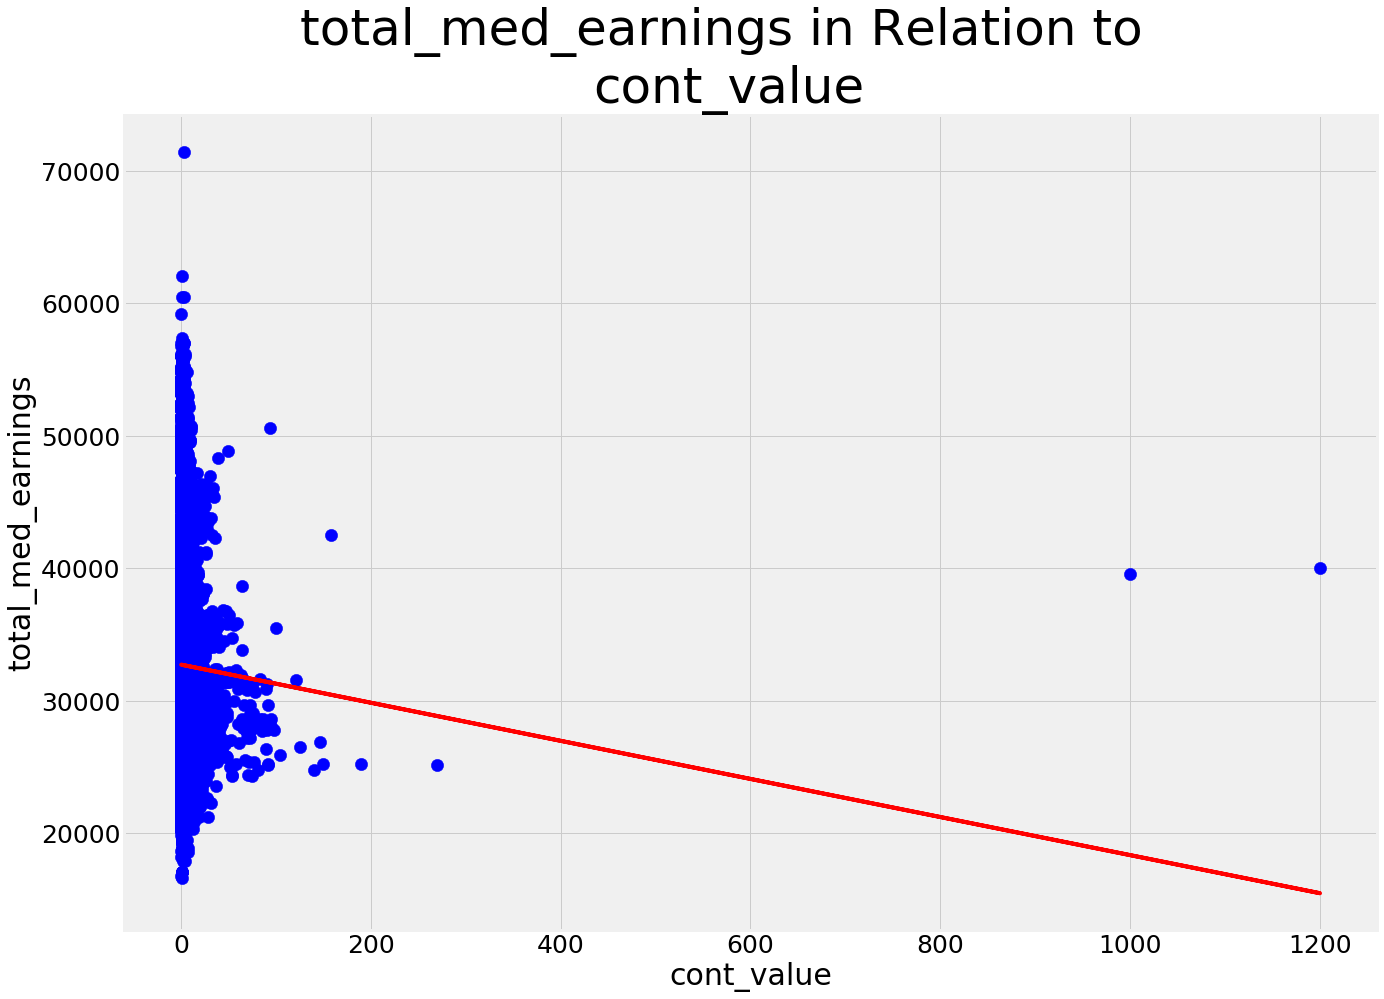

In [21]:
for chem in c_e.chemical_species:
    df_ = c_e[c_e["chemical_species"]==chem]
    b, a, r, p, s = plot(df_["value"][1:], df_["total_med"][1:], "cont_value", "total_med_earnings", chem)

In [3]:
def plot(x,y,x_label,y_label, name):
    figure = plt.figure(figsize = (20,15))
    ax = figure.add_subplot(1,1,1)
    ax.tick_params(axis = 'y', labelsize = 25)
    ax.tick_params(axis='x', labelsize=25)
    ax.scatter(x,y, color = 'b', s = 150)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x+intercept
    plt.plot(x,line, c = 'r')
    print(linregress(x,y))
    plt.xlabel(x_label, fontsize = '30')
    plt.ylabel(y_label, fontsize = '30')
    figure.suptitle(y_label+" in Relation to \n" + x_label, fontsize=50)
    figure.savefig(str(name + ".png"), dpi = 300)
    return slope, intercept, r_value, p_value, std_err

LinregressResult(slope=0.05288821875714914, intercept=32550.160727033555, rvalue=0.010023851747322541, pvalue=5.6337366459993543e-11, stderr=0.008070453308247835)


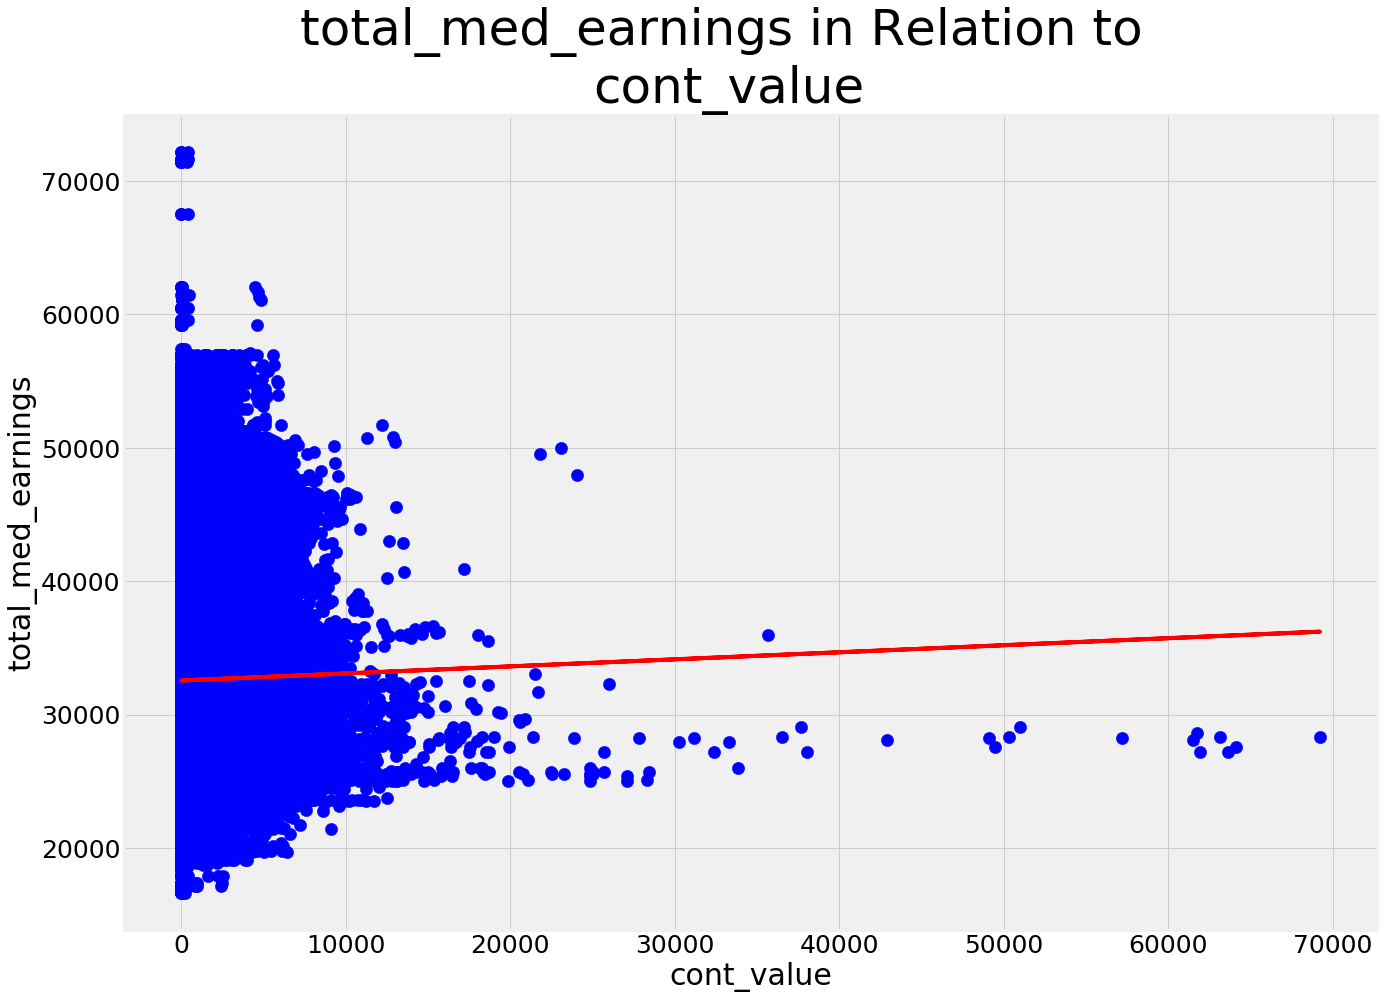

In [20]:
b, a, r, p, s = plot(c_e["value"][1:], c_e["total_med"][1:], "cont_value", "total_med_earnings", "plot1")

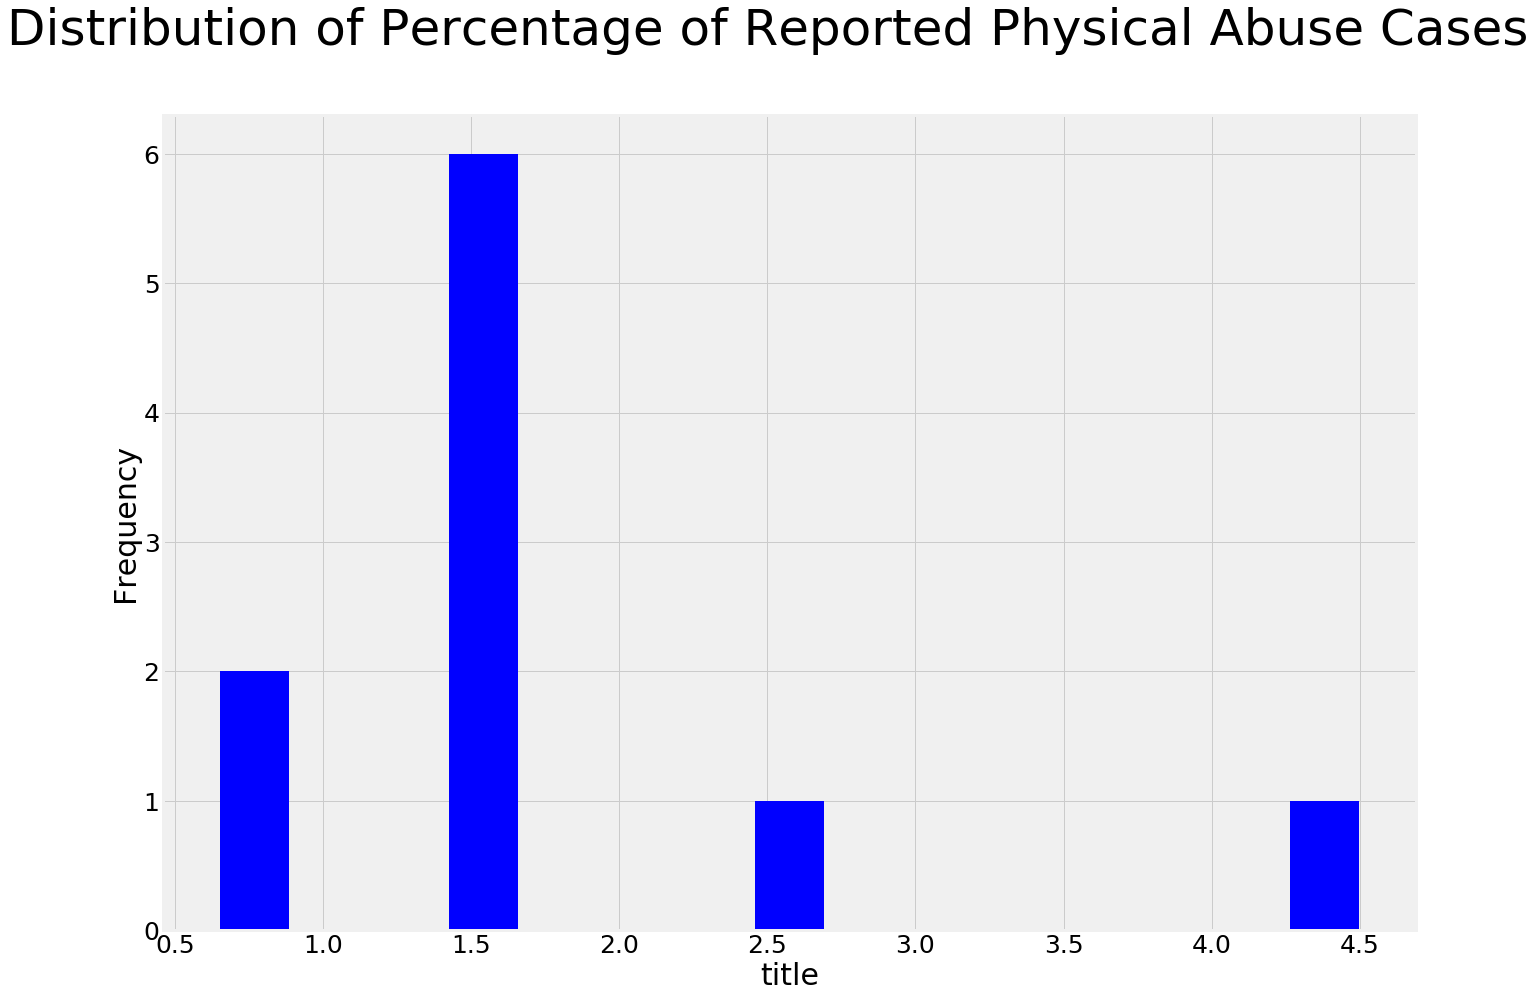

In [7]:
figure = plt.figure(figsize = (20,15))
x_label = "title"
y_label = "Frequency"
plt.hist(chemicals["value"], bins = 15, rwidth = .9, color = 'blue')
plt.xlabel(x_label, fontsize = '30')
plt.ylabel(y_label, fontsize = '30')
plt.tick_params(axis = 'y', labelsize = 25)
plt.tick_params(axis='x', labelsize=25)
figure.suptitle("Distribution of Percentage of Reported Physical Abuse Cases", fontsize=50)
figure.savefig(str("Hist_x1.png"), dpi = 300)

In [8]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)
category = chemicals["value"]
score = earnings["total_med"]
scores_treatment = []
scores_control = []
for i in range(0, len(category.values)):
    if category[i] == 1:
        scores_treatment.append(score[i])
    if category[i] == 2:
        scores_control.append(score[i])
print(len(scores_treatment))
print(len(scores_control))
print(mean(scores_treatment))
print(mean(scores_control))
print(np.std(scores_treatment))
print(np.std(scores_control))

0
0
0.0
0.0
nan
nan


c:\users\jocel\appdata\local\programs\python\python35\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\jocel\appdata\local\programs\python\python35\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\users\jocel\appdata\local\programs\python\python35\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
